checking to see if a 2D histogram helps with visualizing the effects of different features

In [34]:
#libraries and functions
import patientFunctions as ptFn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

# directory

In [35]:
#directory management
#updates to directory management
# machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

folderNameHeader = "FeatHisto"
folderNameCommon = '_Mistic2'
folderNameSuffix = "_241028_v1"

fileNameHeader = "FeatHisto"
fileNameCommon = '_Mistic2'
fileNameSuffix = "_241028_v1"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)


In [36]:
mpl.rcParams['figure.dpi'] = 300

# data used in SVM

In [37]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2/020_construction of data frames' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory, "DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1")

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
model_features = pd.read_excel("AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name = "ALL", header = [0])
# features_across_models= model_features



storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

In [38]:
#reindex the dataframe
new_index = [x for x in model_features["DeID"]]

model_features.index = new_index

# features selected across models

In [39]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
features_across_models = pd.read_excel("PerfFeatList_Mistic2_20241024.xlsx", sheet_name = "feature list best models", header = [0])
#columns 1,2,3,4 are the columns with list of features.  The header row tells you the the features came from


# raw data


In [40]:
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

new_dirrectory = path
os.chdir(new_dirrectory)

In [41]:
#build a dictionary of patients and their values 
ptFiles = ptFn.GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}
patientDictChemo = {}
patientDictImmuno = {}
patientDictHeme = {}
patientDictRad = {}
patientDictOther = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = ptFn.patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    patientDictChemo[pt.ptID] = pt.ChemoTx
    patientDictImmuno[pt.ptID] = pt.ImmunoTx
    patientDictHeme[pt.ptID] = pt.HemeTx
    patientDictRad[pt.ptID] = pt.RadTx
    patientDictOther[pt.ptID] = pt.OtherTx

In [42]:
#sort the patient list by amyloid status

listPositive = []
listNegative = []
listOther = []

ptFn.getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

list_pts_remove = ["K-01", "G-01", "J-01", "L-02"]
for pt in list_pts_remove:
    if pt in listPositive:
        listPositive.remove(pt)
    if pt in listNegative:
        listNegative.remove(pt)
    if pt in listOther:
        listOther.remove(pt)

#first make a copy of the list
listALKnown = listPositive.copy()
#add the negative patients to the list of positive patients
listALKnown.extend(listNegative) 


# Segment data

In [43]:
list_allpossible_features = [x for x in model_features.columns]
list_allpossible_features = list_allpossible_features[6:]

In [44]:
model_features_positive = model_features.loc[listPositive]
model_features_negative = model_features.loc[listNegative]

In [45]:
#features import from the models
models_list = ["desc stats + fits", "desc stats", "params only"]
features_selected = features_across_models["desc stats + fits"]

# Plot histograms

In [46]:
#plot features
alpha = 0.5
color_positive = "red"
color_negative = "blue"

In [47]:
#dimensions for the multiple plots in one figure 
rows_for_fig = 8
cols_for_fig = 8
number_of_figs_in_plot = rows_for_fig*cols_for_fig
positions = [(i // cols_for_fig, i % cols_for_fig) for i in range(rows_for_fig * cols_for_fig)]

columnsForFigure = list_allpossible_features
#slice the list of columns in groups 

slices_sorted = [columnsForFigure[i:i + number_of_figs_in_plot] for i in range(0, len(columnsForFigure), number_of_figs_in_plot)] 

In [48]:
# #Plots histograms
# i = 0
# for feature in features_selected: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     figCommon = fileNameCommon + "_histo_" + str(i) +"_"
#     fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

## 2D histograms

In [49]:
#import features from feature compliation list
# #features import from the models
# models_list = ["desc stats + fits", "desc stats", "params only"]
# features_selected = features_across_models.loc["desc stats + fits"]

In [50]:

featuresToPlot = list(features_selected)
featuresToPlot = featuresToPlot.append(["Amyloid Status_yes"])

In [51]:
os.getcwd()

'C:\\Users\\maega\\UFL Dropbox\\Maegan Cremer\\research-share\\Maegan\\Projects\\Cardiac-Amyloidosis-Multiple-Myeloma\\012 Processed Data\\data-2024-06-05'

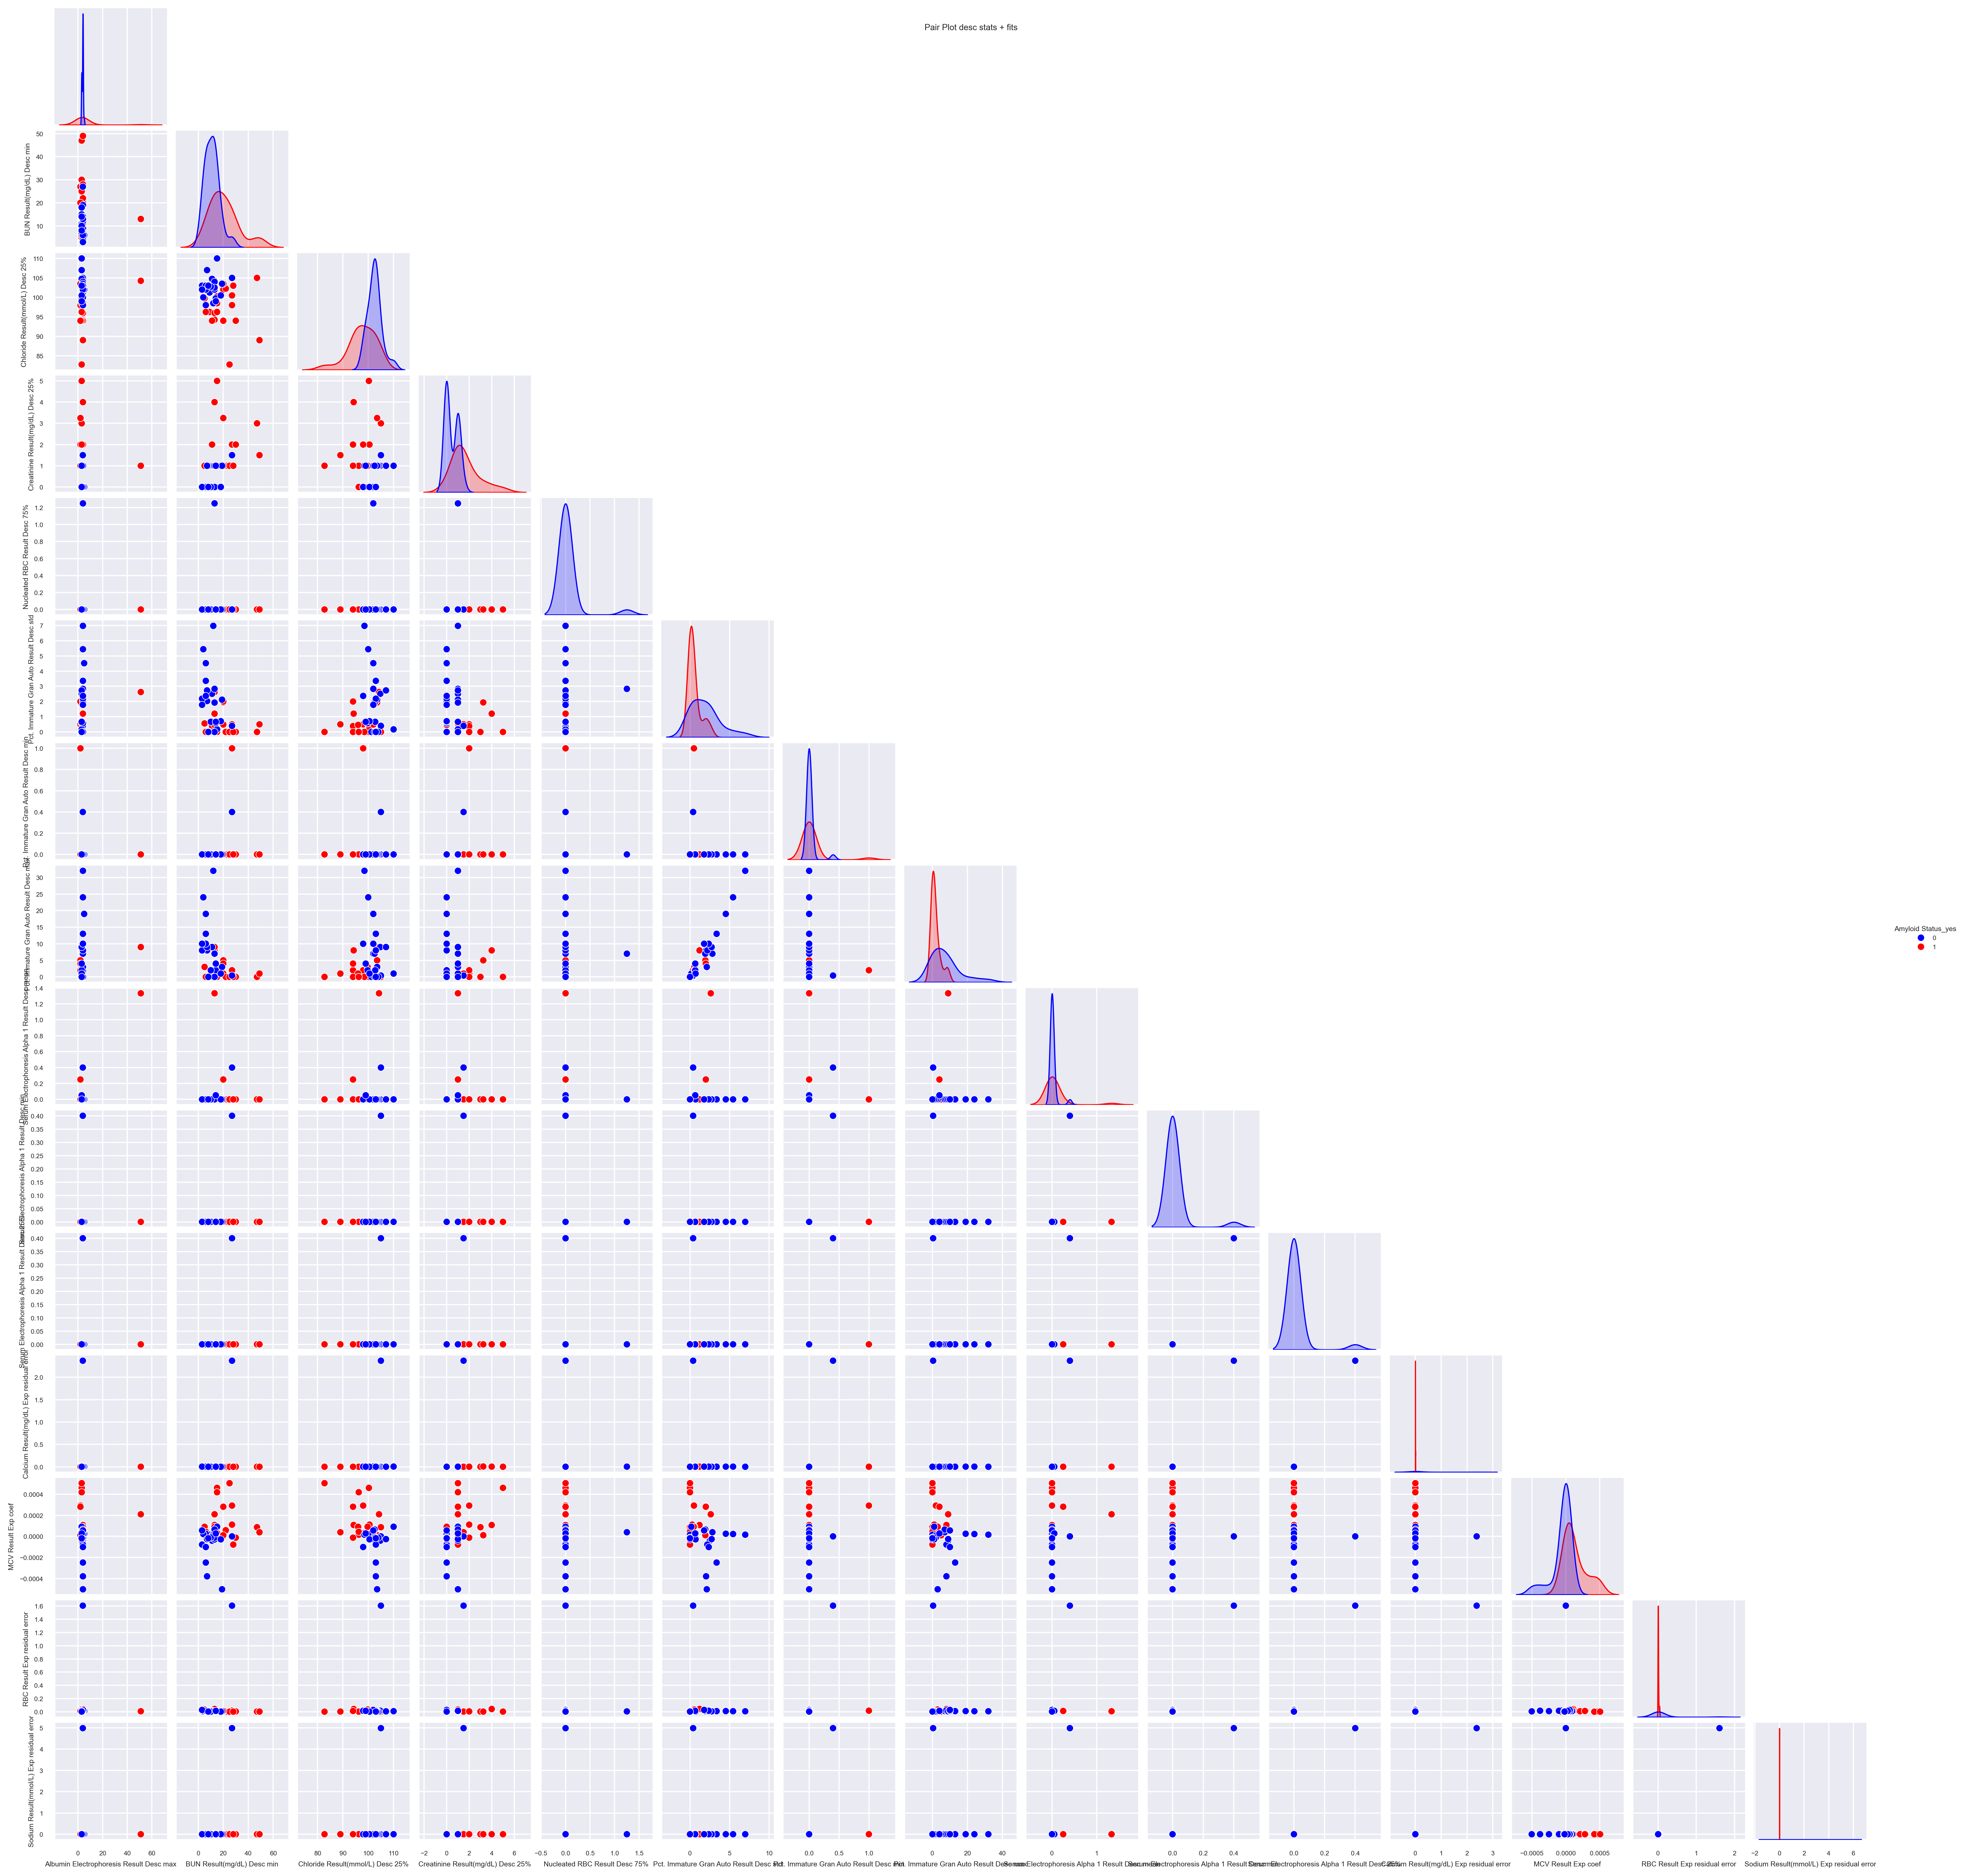

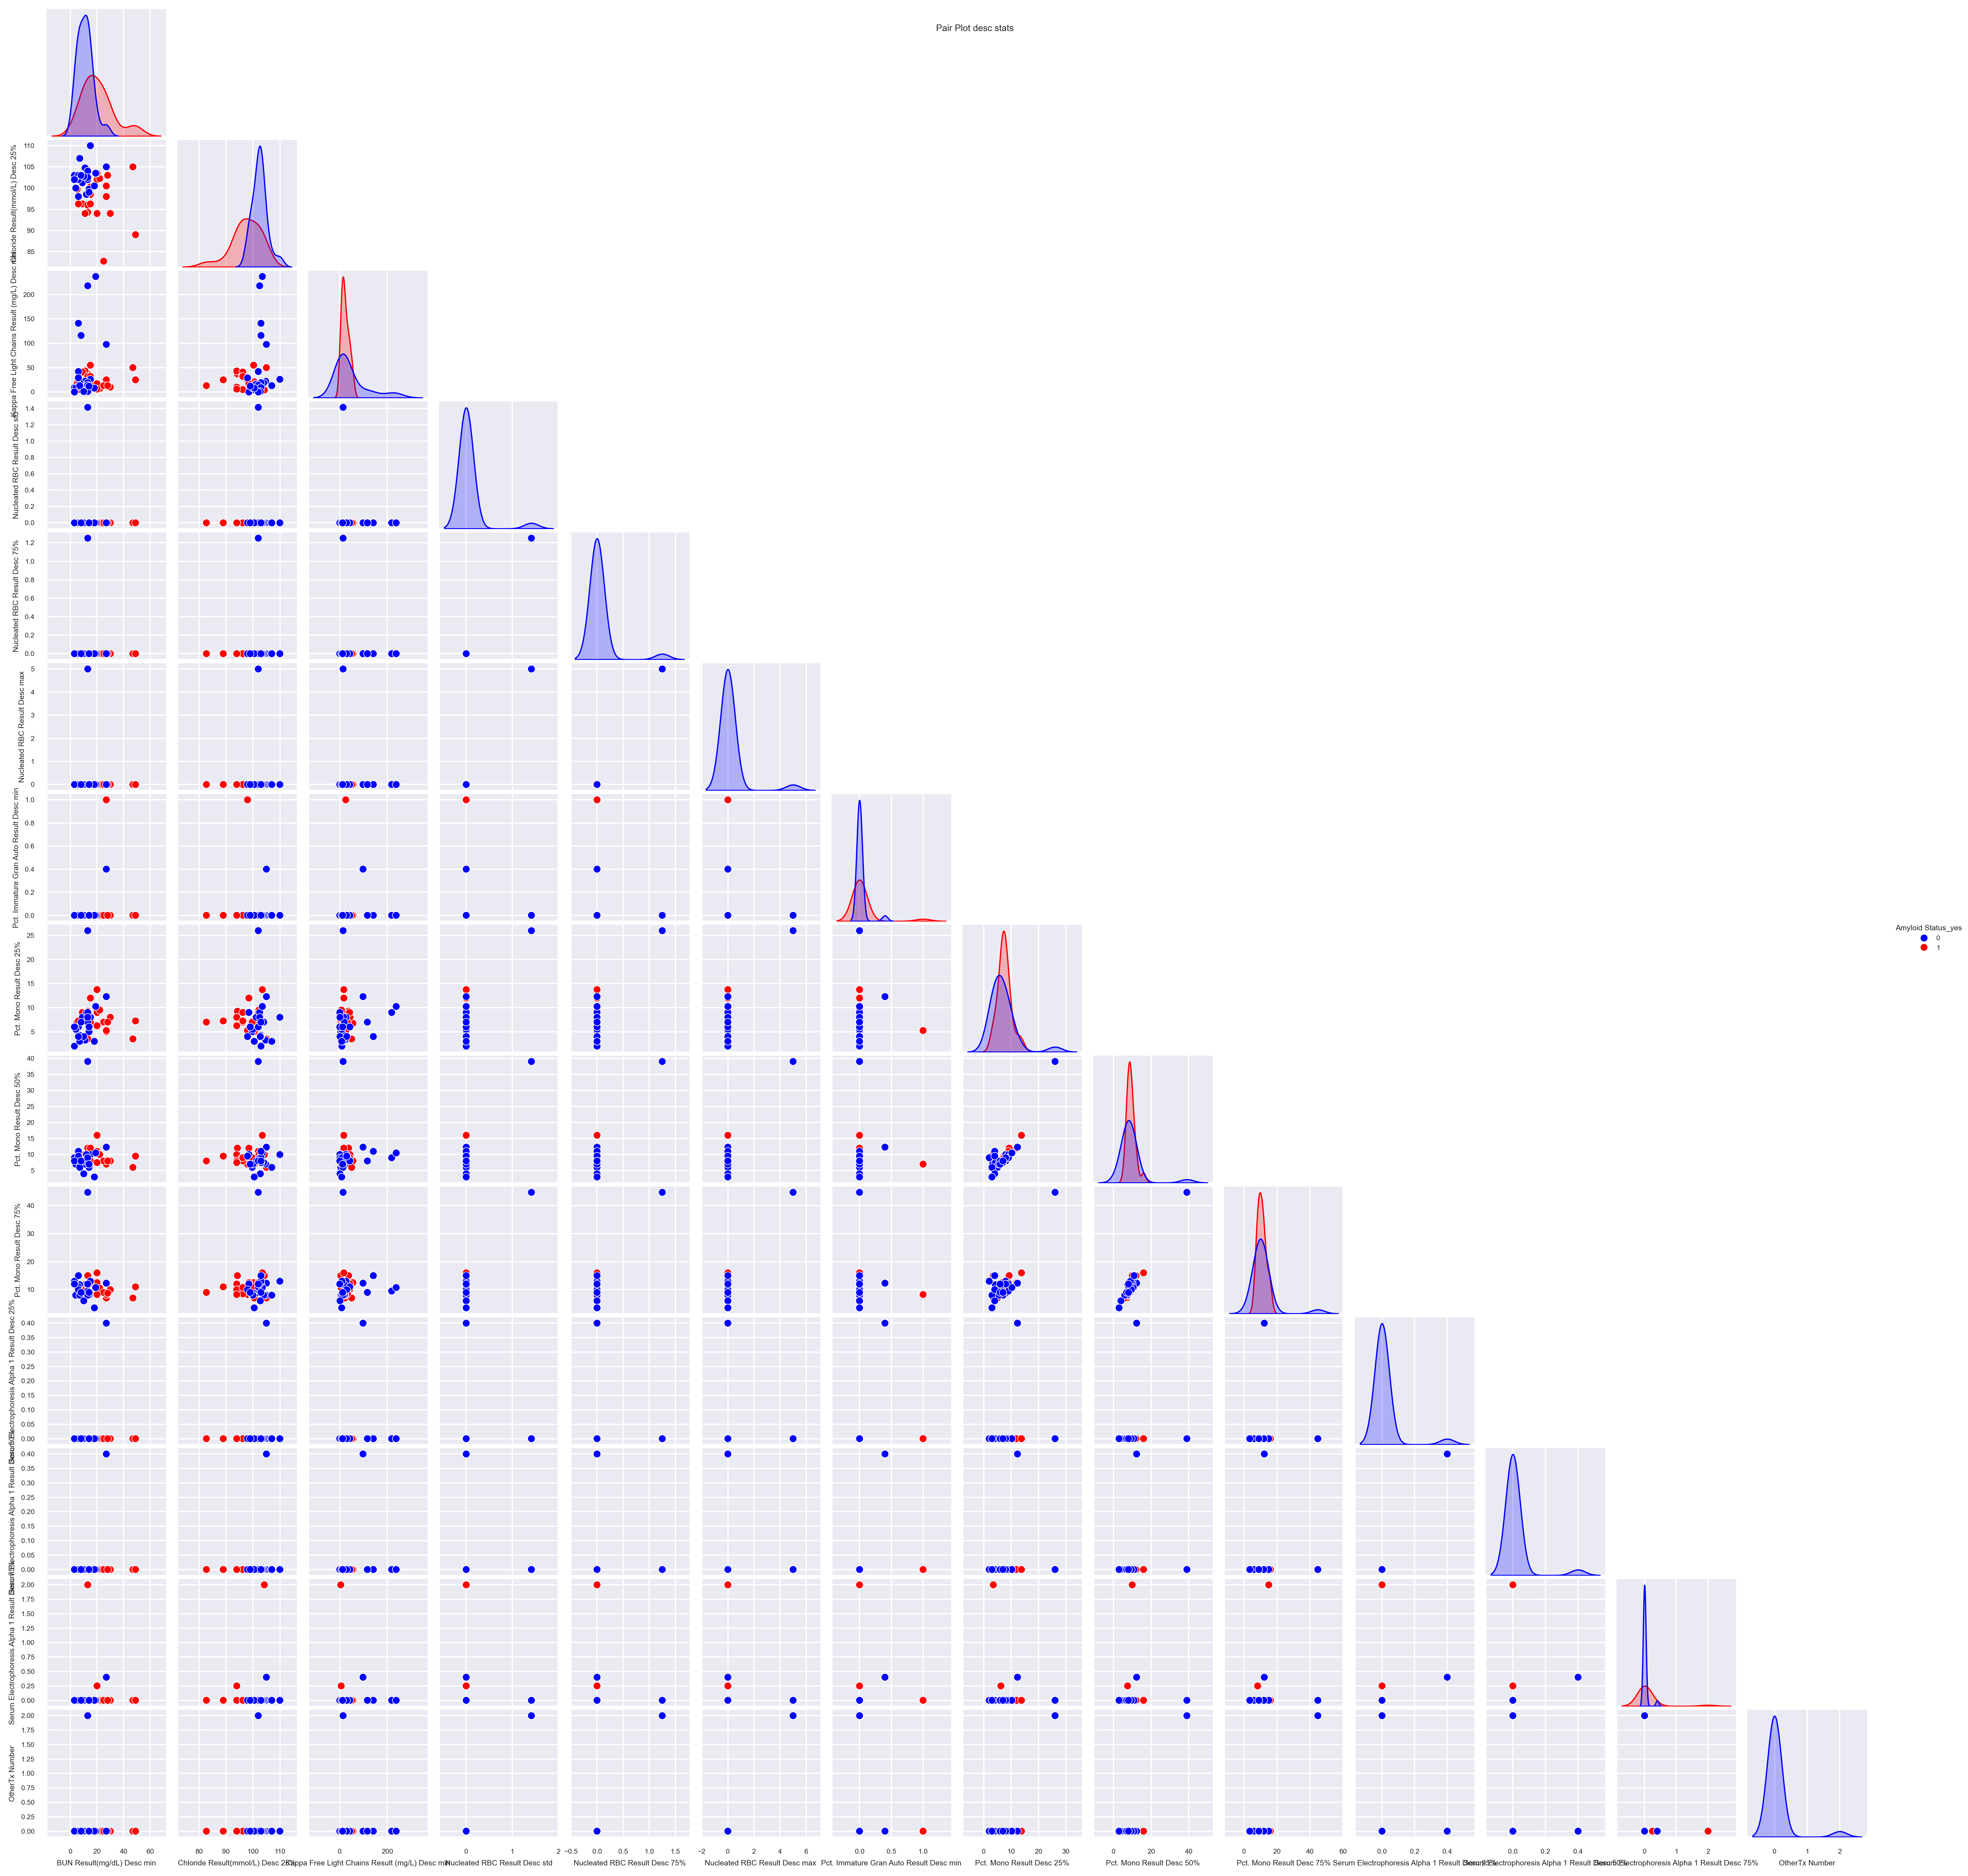

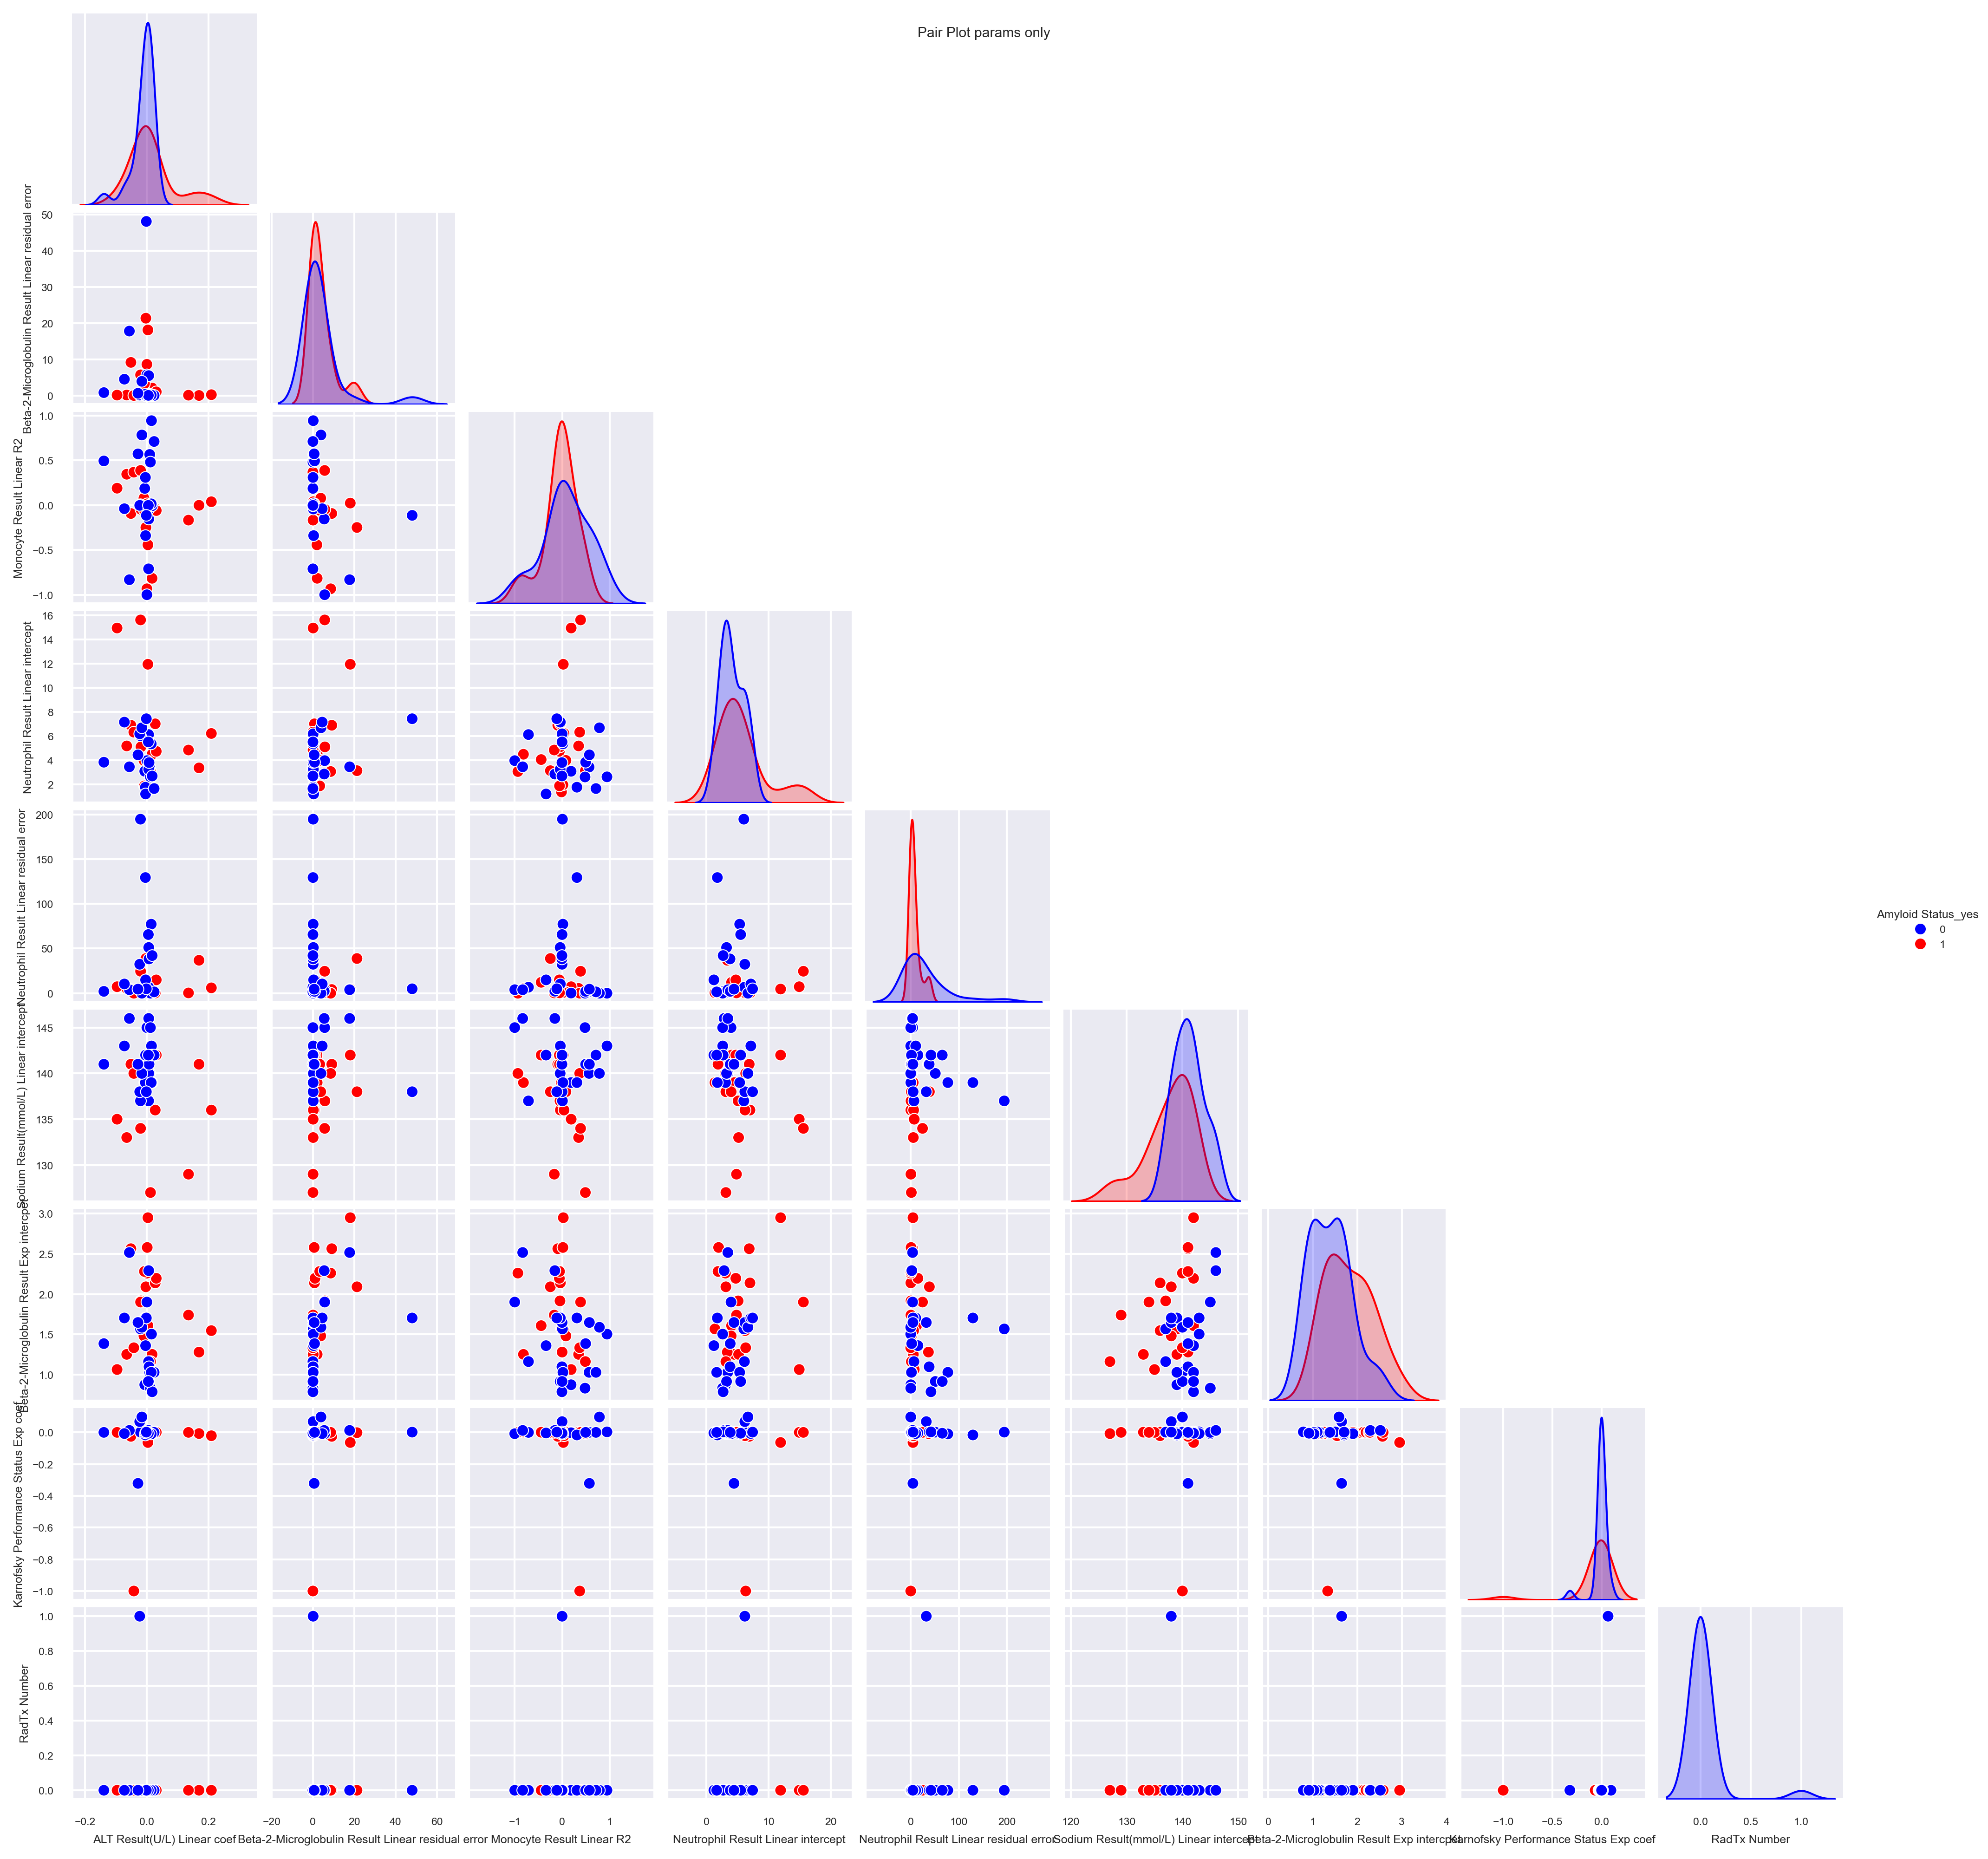

In [57]:
sns.set(font_scale = 0.5)
palette = {1 :'red', 0: 'blue'} #our data is of int64

i = 1 
for model in models_list:
    featuresToPlot = list(features_across_models[model].dropna())
    featuresToPlot.append("Amyloid Status_yes")
    # print(featuresToPlot)
    fig = sns.pairplot(model_features[featuresToPlot],hue= "Amyloid Status_yes", palette=palette, corner=True, height = 1.5)
    # fig.map_lower(sns.kdeplot, levels = 4)
    fig.fig.suptitle("Pair Plot " + str(model))

    figCommon = "pairplot_" + str(i)
    fig_file_out = ptFn.outputFiguresPath(fileName_header="", fileName_mid=figCommon, 
                                    fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    fig.savefig(fig_file_out, bbox_inches = 'tight')
    i = i+1 

In [58]:
# #Plots histograms
# i = 0
# for feature in features_selected: 
#     fig, ax = plt.subplots()
#     ax.hist(model_features_positive[feature], color = color_positive, alpha = alpha)
#     ax.hist(model_features_negative[feature], color = color_negative, alpha = alpha)
#     amyloidpositive_patch = mpatches.Patch(color = color_positive, alpha = alpha, label = "Amyloid Positive")
#     amyloidnegative_patch = mpatches.Patch(color = color_negative, alpha = alpha, label = "Amyloid Negative")
#     ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch])
#     fig.suptitle(feature + " by Amyloid status")

#     figCommon = fileNameCommon + "_histo_" + str(i) +"_"
#     fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=figCommon, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
#     fig.savefig(fig_file_out, bbox_inches = 'tight')
#     i = i+1

In [59]:
# fig, ax = plt.subplots()
# ax.hist2d(model_features_positive[feature_1], model_features_positive[feature_2], bins = (50,50), cmap = plt.cm.Blues)

# statistics for data used in classifer

code borrowed from AmyloidVsEchoValues

In [60]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [61]:
#for t test for comparing amyloid positive and negative 
#final comparisons will be done using graphpad

ALPostiveData = model_features.loc[listPositive]
ALNegativeData = model_features.loc[listNegative]

dict_imagingValue_stats = {}
dict_imagingValue_variance_stats = {}
for imagingValue in features_selected:
    #filtering the data to remove the penalty values and missing values
    
    dataPostive = ALPostiveData[imagingValue].dropna(axis = 'index')
    dataNegative = ALNegativeData[imagingValue].dropna(axis = 'index')

    #check for variance
    levene_test = stats.levene(dataPostive, dataNegative, nan_policy="omit")
    #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
    dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

    dict_imagingValue_stats[imagingValue] = ttest_ind(dataPostive, dataNegative, equal_var=False)
    #using equal_var False results in Welch's nonparametric t tests
    #equality of variance should be checked using Barlett's or Levene's tests and the histograms

df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

#sort the data by pvalue
df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

ptFn.outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName= "Welch-T-test Features")

# plots for a different set of data

collecting all raw values by amyloid status.  calculating T test difference between amyloid positive an negative without weighting by number of measures for a patient... patient identifiers removed.

# plotting raw labs by amyloid status

### collecting labs by amyloid status

In [62]:
columnsToUse = ["Ferritin Result(ng/mL)","Troponin-T","NT Pro BNP (B-Type Natriuretic Peptide)","Beta-2-Microglobulin Result",
                "ALT Result(U/L)","LDH Result(U/L)","Creatinine Result(mg/dL)","Potassium Result(mmol/L)","Glucose Result",
                "total CO2 Result","Sodium Result(mmol/L)","Calcium Result(mg/dL)","Chloride Result(mmol/L)","BUN Result(mg/dL)",
                "Platelet Count Result(k/uL)","Hemoglobin Result","MCV Result","MCHC Result","MCH Result(pg)","HCT Result",
                'RBC Result','WBC Result(k/uL)','Albumin Result(gm/dL)','Pct. Mono Result','Pct. Neutrophil Result',
                'Neutrophil Result','Monocyte Result','Nucleated RBC Result','Pct. Immature Gran Auto Result','AST Result(U/L)',
                'Total Serum Protein Result','Kappa Free Light Chains Result (mg/L)','Serum Electrophoresis Gamma Result','Albumin Electrophoresis Result',
                'Serum Electrophoresis Alpha 1 Result','Serum Electrophoresis Alpha 2 Result','Serum Electrophoresis Beta Result']

In [63]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in (patientDictLabs.keys()):
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs

    columnNames = ptFn.FilterList(orig_columns, keyWords_primary = columnsToUse,
                             omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result", "Urine Glucose Result(mg/dL)", "Pct. Atypical Lymphocyte Result",
                                        "Indirect Bilirubin Result", "Atypical Lymphocyte Result"])
    
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)


    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2


C:\Users\maega\AppData\Local\Temp\ipykernel_23456\772306358.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_23456\772306358.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Use

In [64]:
# labsPositive = [dictOfFilteredLabs[x] for x in listPositive]

i = 0 
for x in listPositive: 
    #get the patient data
    ptData = dictOfFilteredLabs[x]

    #add the pt ID to the frame 
    # ptIDIndex = [x for row in len(ptData)]
    # ptData.index = 

    #check to see if there is a data frame
    if i == 0: 
        labsPositive = ptData
    else: 
        labsPositive = pd.concat([labsPositive, ptData], axis = 0)
    i = i+1
    #concatinate to the existing data

In [65]:
# repeat for amyloid negative 
# labsPositive = [dictOfFilteredLabs[x] for x in listPositive]

i = 0 
for x in listNegative: 
    #get the patient data
    ptData = dictOfFilteredLabs[x]

    #add the pt ID to the frame 
    # ptIDIndex = [x for row in len(ptData)]
    # ptData.index = 

    #check to see if there is a data frame
    if i == 0: 
        labsNegative = ptData
    else: 
        labsNegative = pd.concat([labsNegative, ptData], axis = 0)
    i = i+1
    #concatinate to the existing data

### stats

In [66]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats

In [67]:
#comparing positive and negative 


#for t test for comparing amyloid positive and negative 
#final comparisons will be done using graphpad

ALPostiveData = labsPositive
ALNegativeData = labsNegative

dict_imagingValue_stats = {}
dict_imagingValue_variance_stats = {}
for imagingValue in columnNames:
    #filtering the data to remove the penalty values and missing values
    
    dataPositive = ALPostiveData[imagingValue].dropna(axis = 'index')
    dataNegative = ALNegativeData[imagingValue].dropna(axis = 'index')

    #check for variance
    levene_test = stats.levene(dataPositive, dataNegative, nan_policy="omit")
    #the brown-forsythe might be more appropriate depending on scewness hense moving to graphpad for final analysis
    dict_imagingValue_variance_stats[imagingValue] = [levene_test.statistic, levene_test.pvalue]

    dict_imagingValue_stats[imagingValue] = ttest_ind(dataPositive, dataNegative, equal_var=False)
    #using equal_var False results in Welch's nonparametric t tests
    #equality of variance should be checked using Barlett's or Levene's tests and the histograms

df_imagingValue_stats = pd.DataFrame.from_dict(dict_imagingValue_stats, orient = "index")
df_imagingValue_variance_stats = pd.DataFrame.from_dict(dict_imagingValue_variance_stats, orient = "index")
df_imagingValue_variance_stats.columns = ["levene_statistic", "levene_pvalue"]

df_imagingValue_stats_2 = pd.concat([df_imagingValue_stats,df_imagingValue_variance_stats], axis=1)

#sort the data by pvalue
df_imagingValue_stats_2 = df_imagingValue_stats_2.sort_values(by='pvalue', ascending=True)

ptFn.outputToExcel(df_data = df_imagingValue_stats_2, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName= "Welch-T-test Labs")

### plots

In [68]:
#filter the list of information to plot by the Welch pvalue
columns_to_plot = list(df_imagingValue_stats_2.loc[df_imagingValue_stats_2['pvalue'] <= 0.05].index)
print(columns_to_plot)

['Creatinine Result(mg/dL)', 'Chloride Result(mmol/L)', 'BUN Result(mg/dL)', 'Calcium Result(mg/dL)', 'Sodium Result(mmol/L)', 'Platelet Count Result(k/uL)', 'Beta-2-Microglobulin Result', 'total CO2 Result', 'Pct. Immature Gran Auto Result', 'Hemoglobin Result', 'MCHC Result', 'HCT Result', 'RBC Result', 'Pct. Neutrophil Result', 'MCH Result(pg)', 'AST Result(U/L)', 'Troponin-T', 'ALT Result(U/L)', 'Nucleated RBC Result', 'Serum Electrophoresis Alpha 1 Result', 'Potassium Result(mmol/L)', 'Albumin Result(gm/dL)']


C:\Users\maega\AppData\Local\Temp\ipykernel_23456\1700766775.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


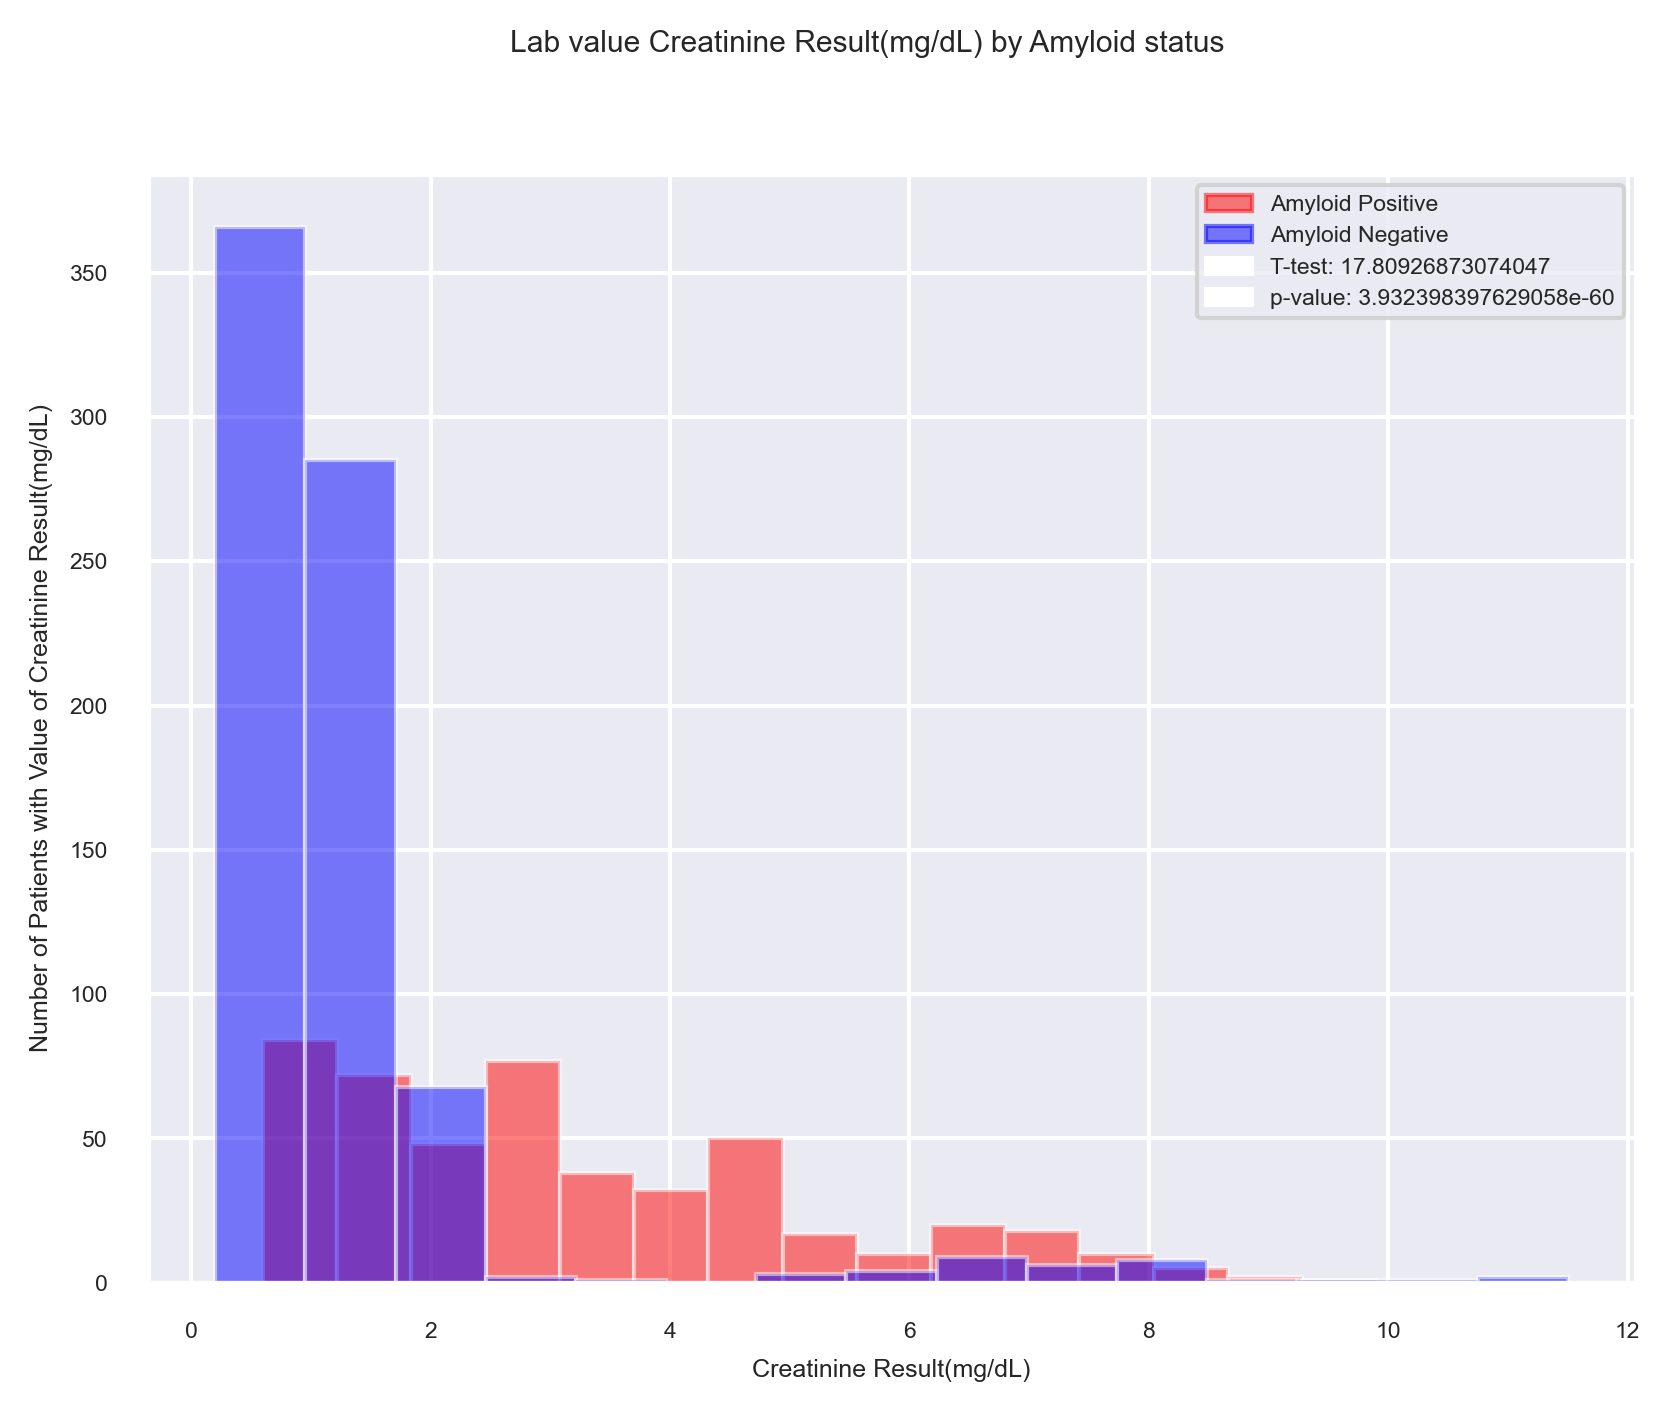

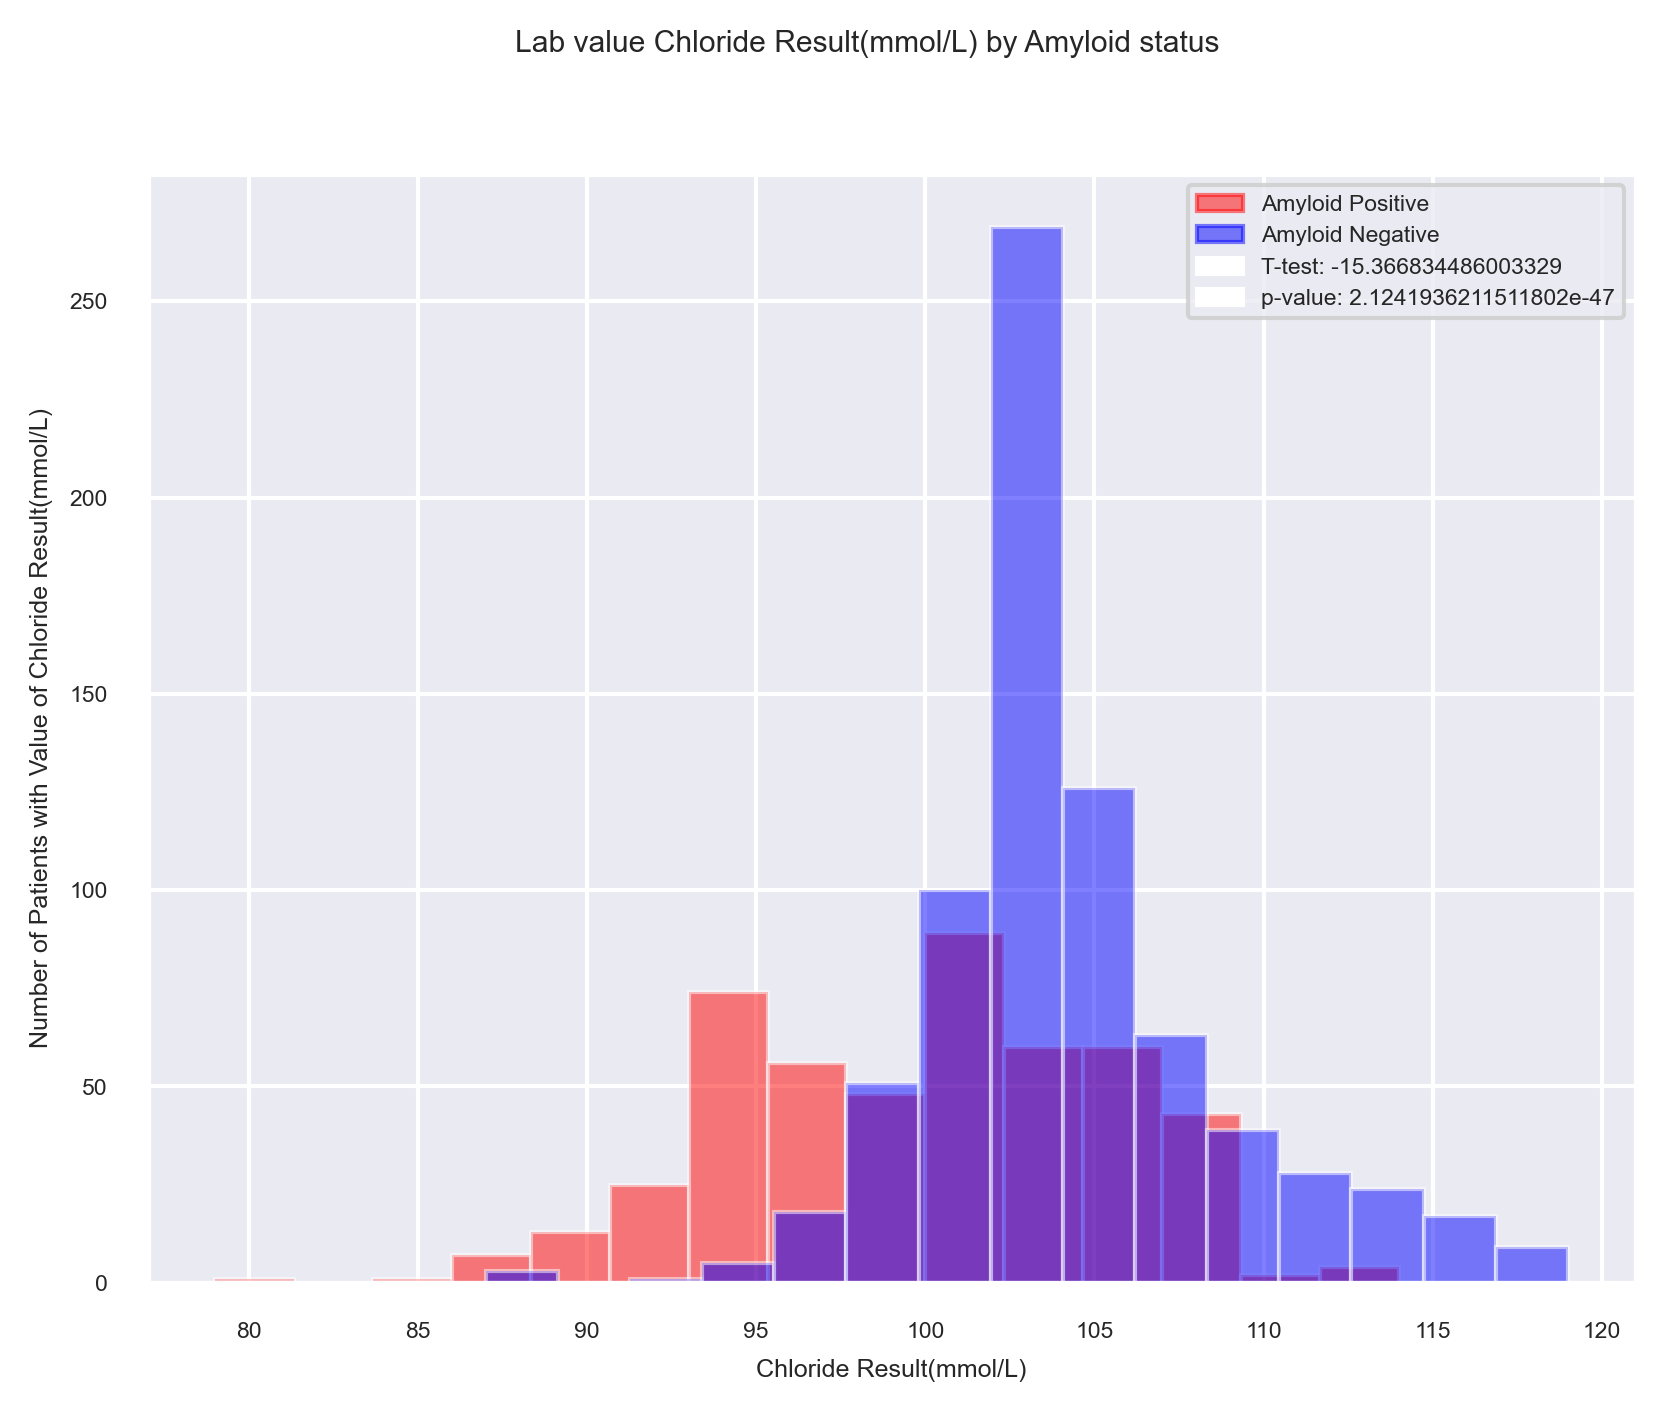

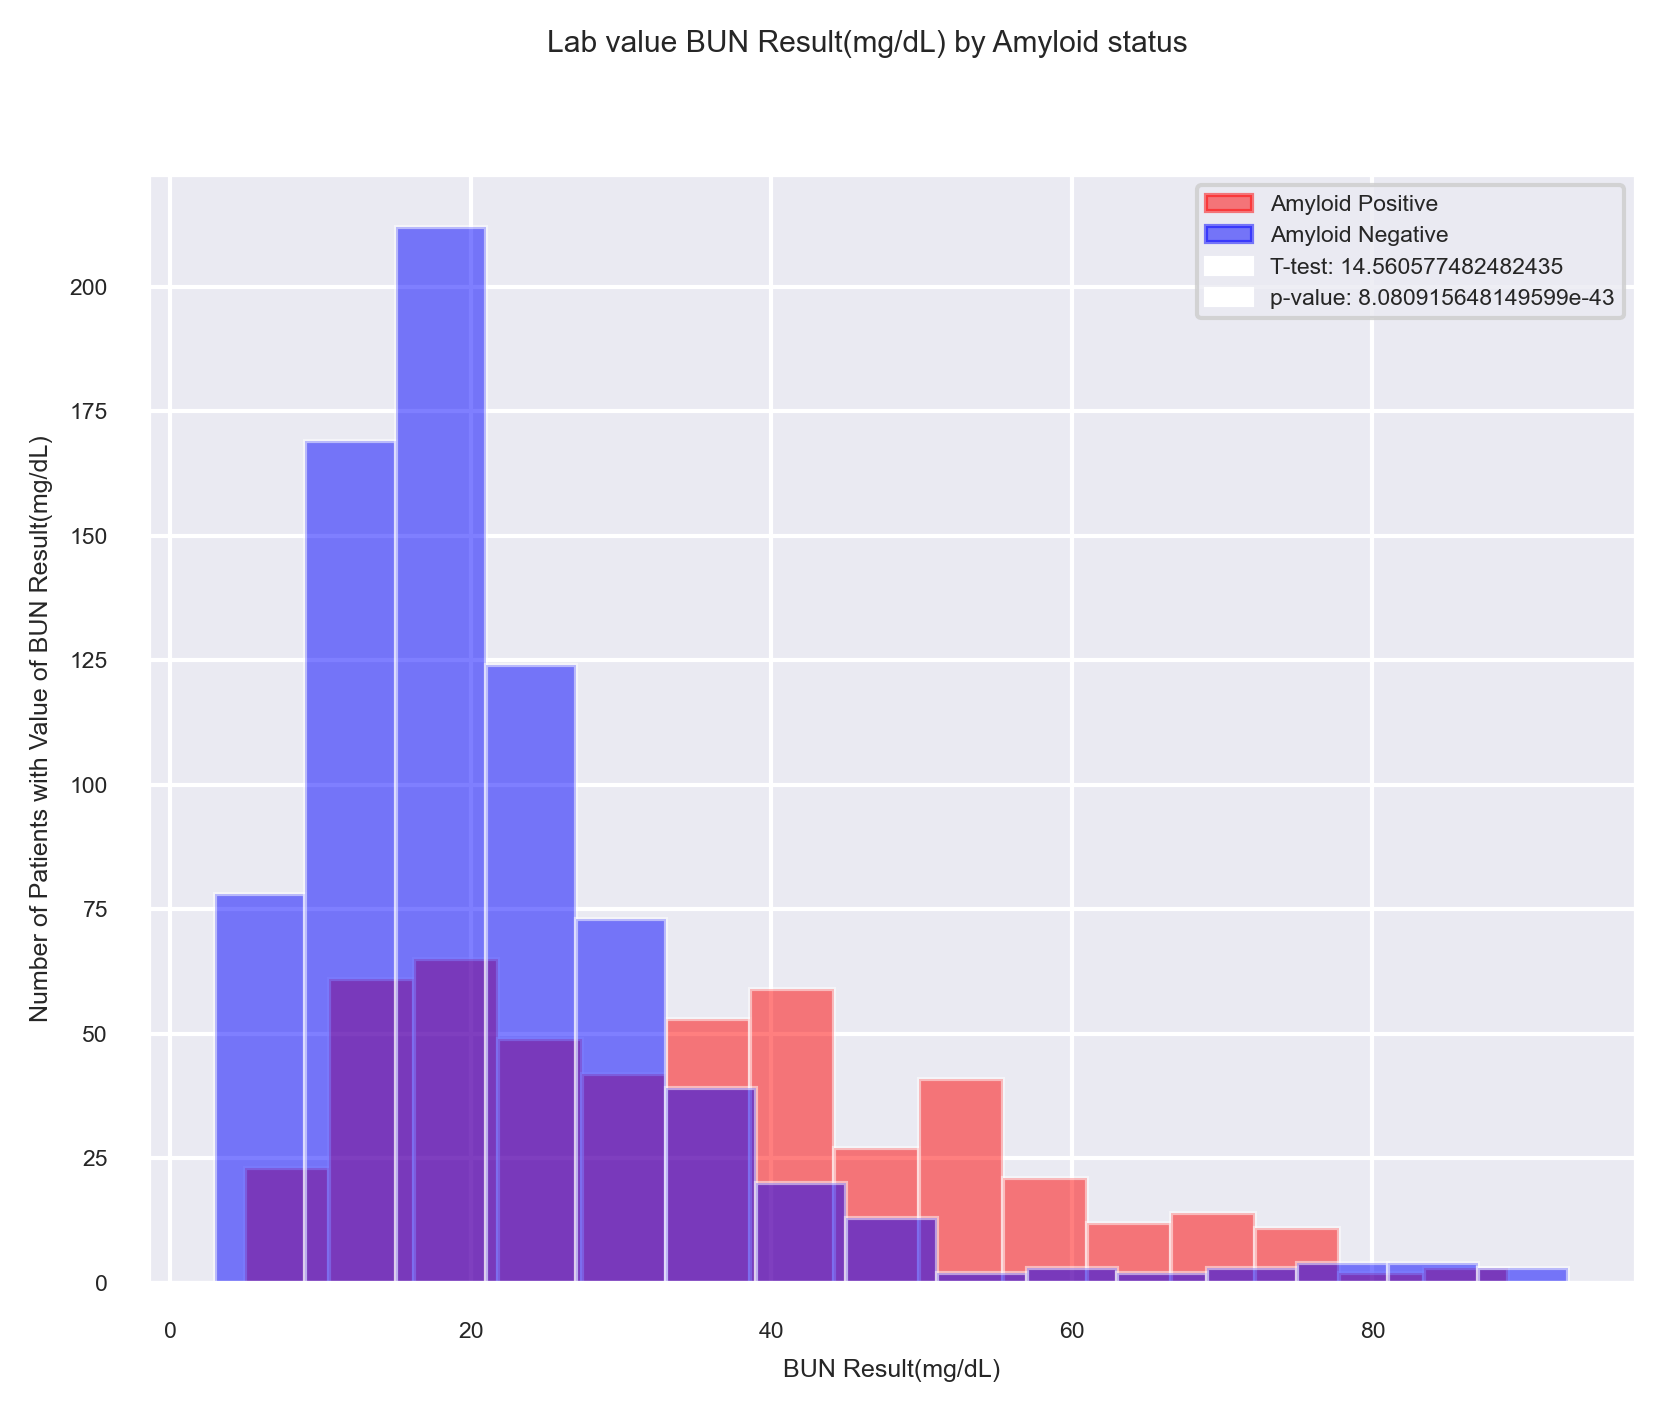

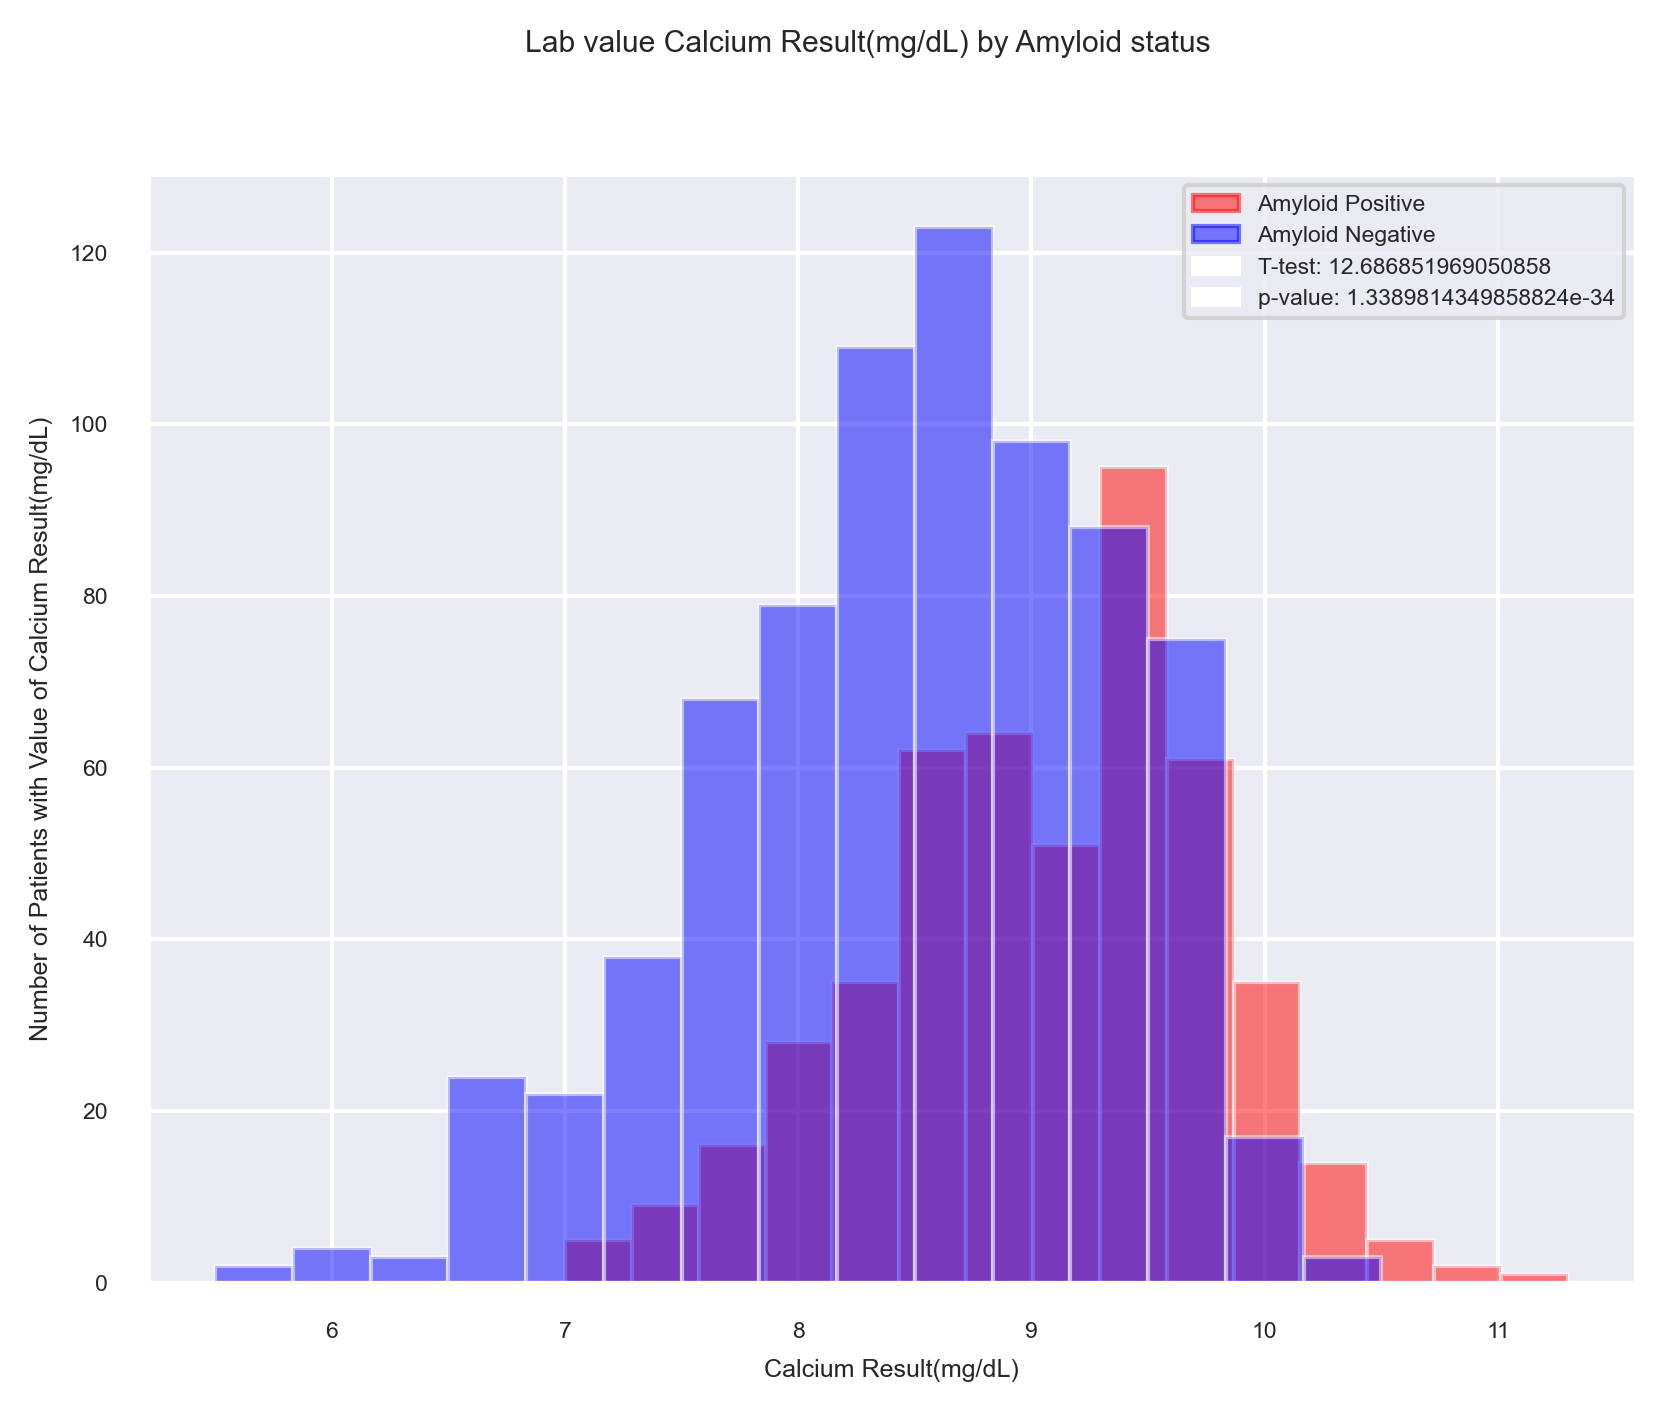

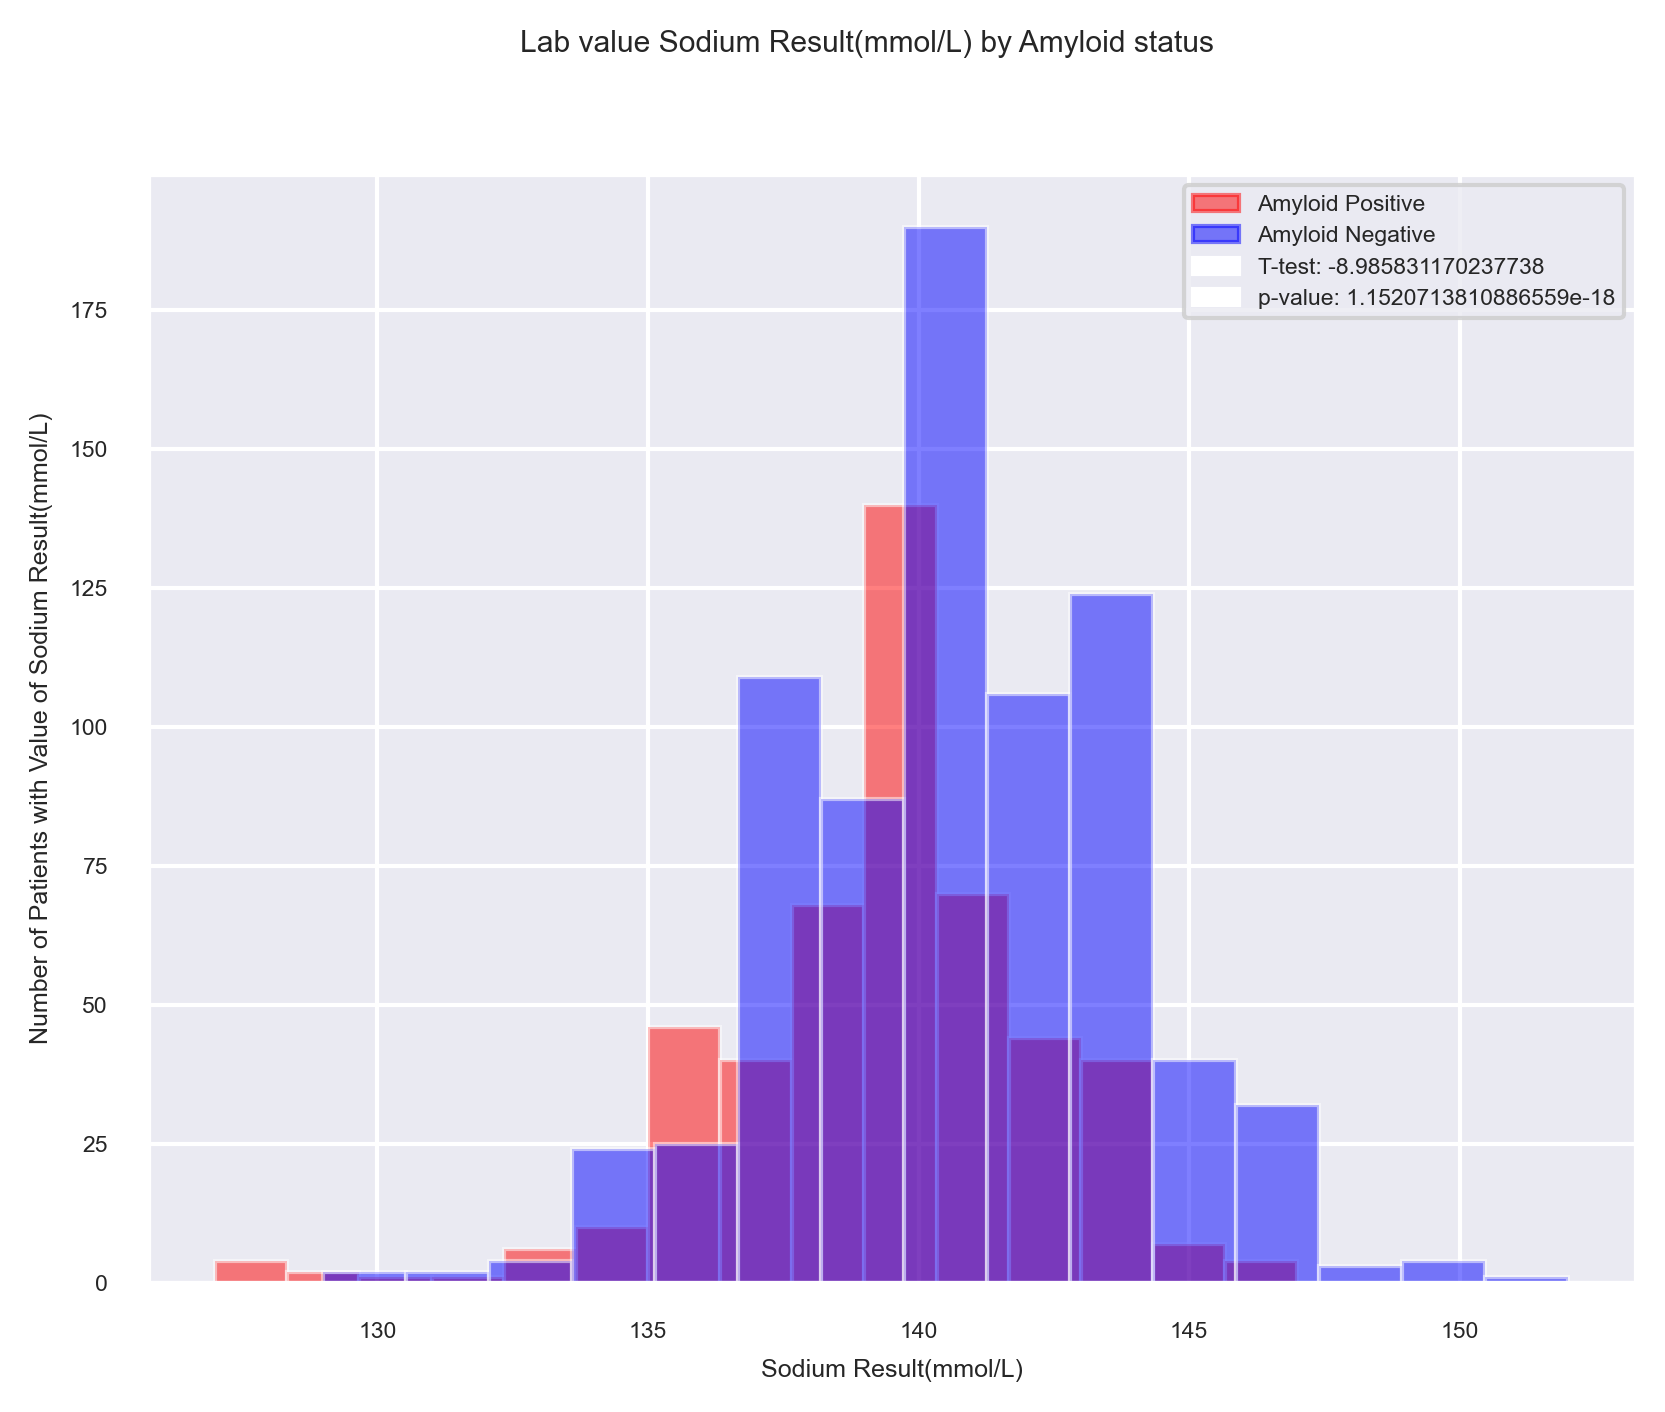

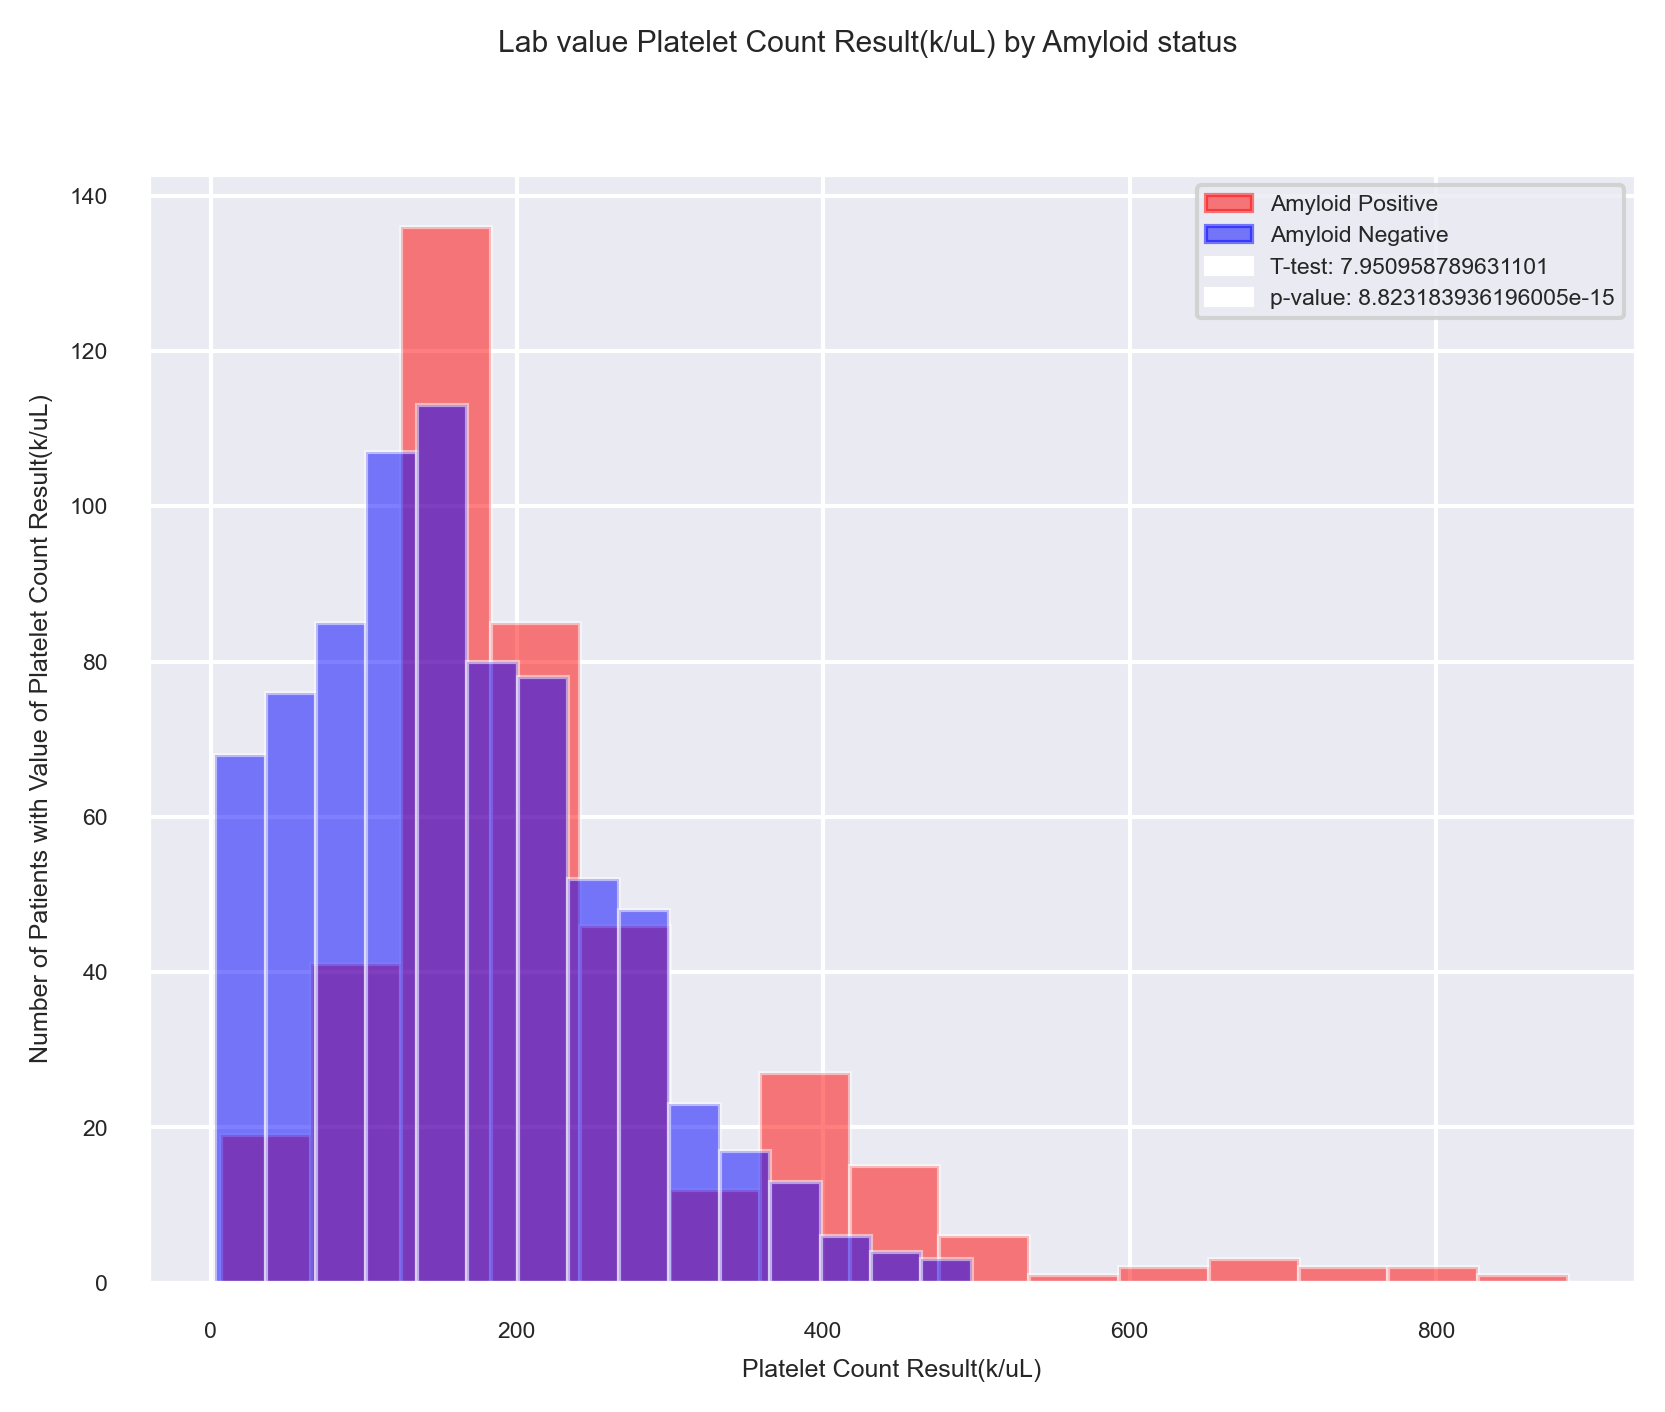

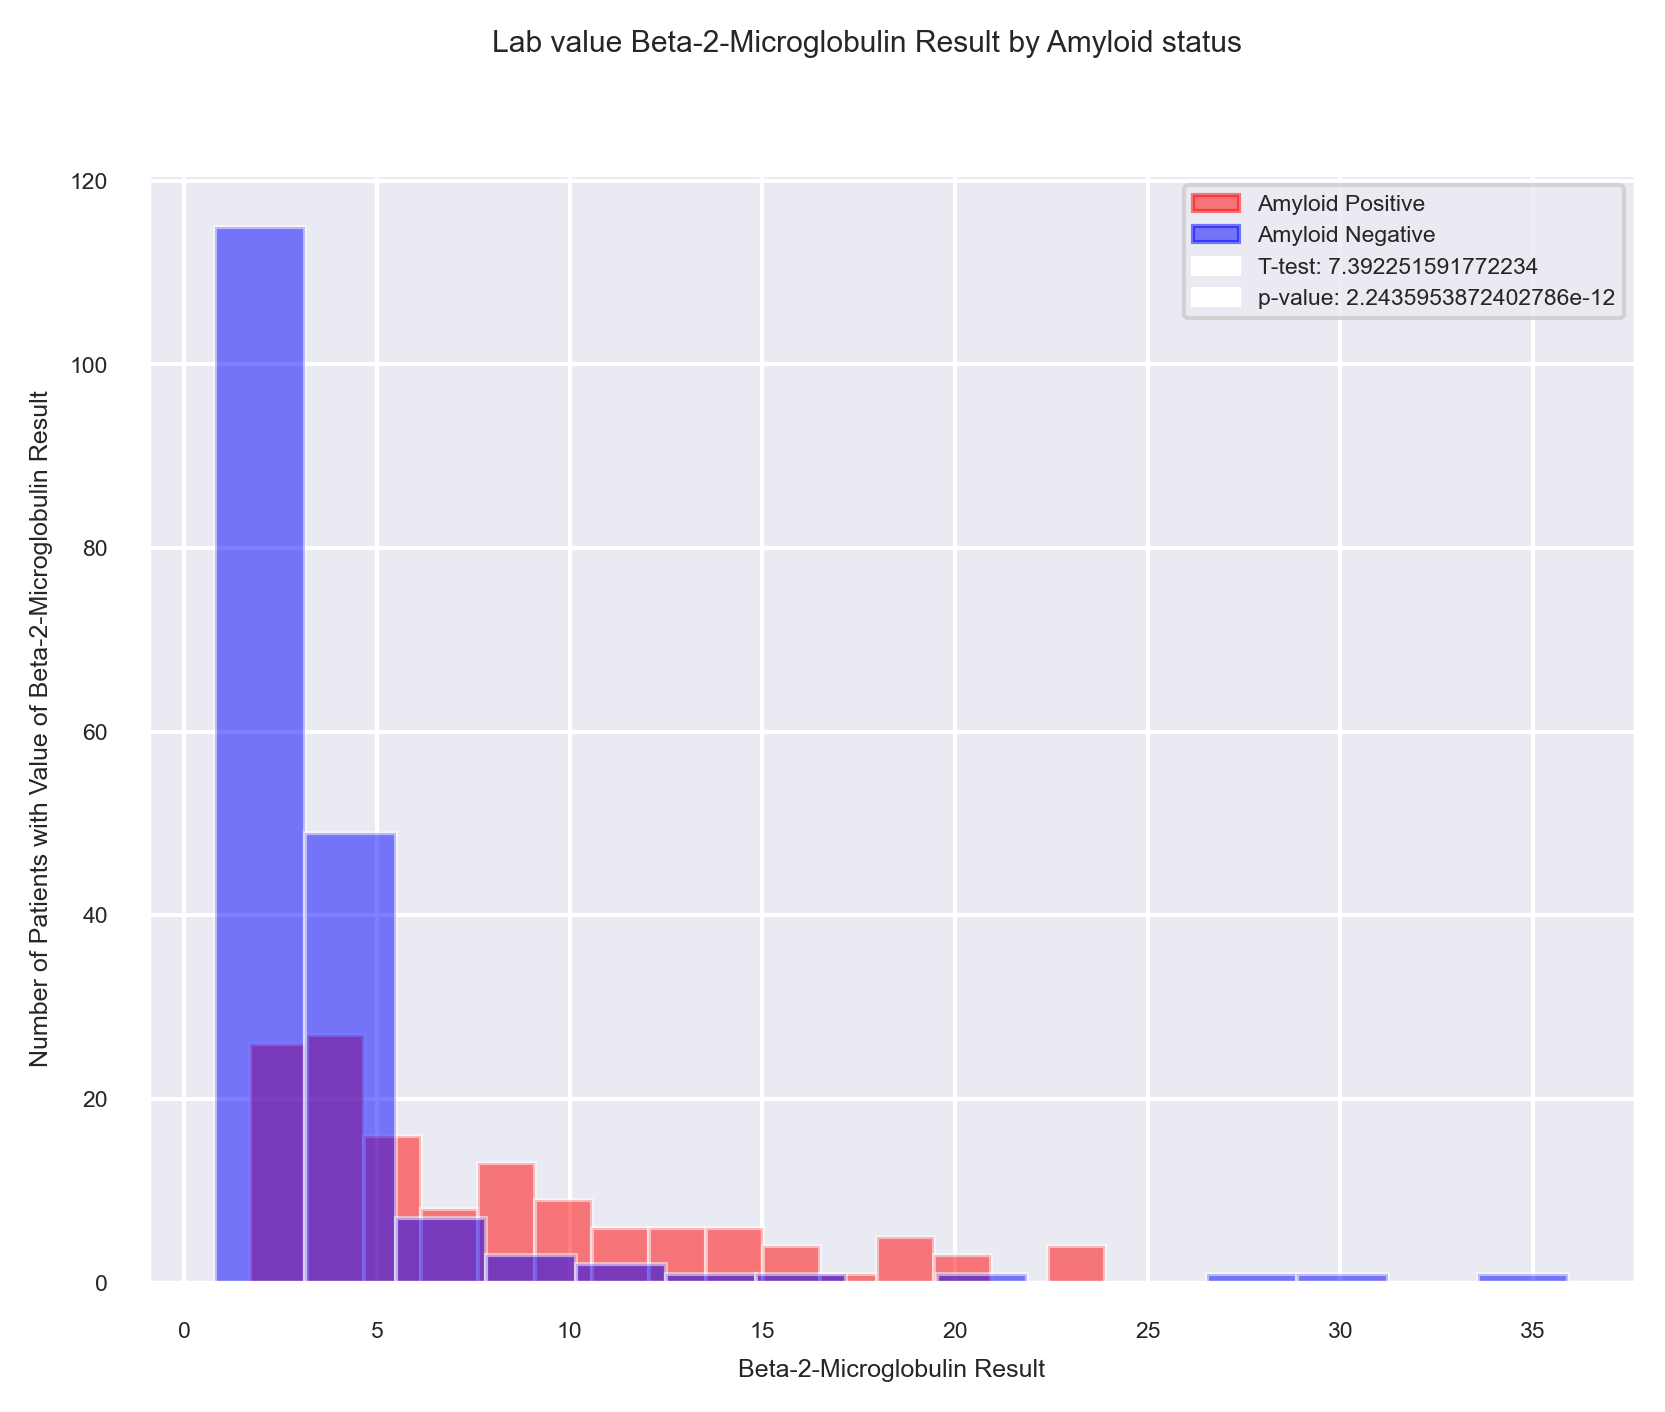

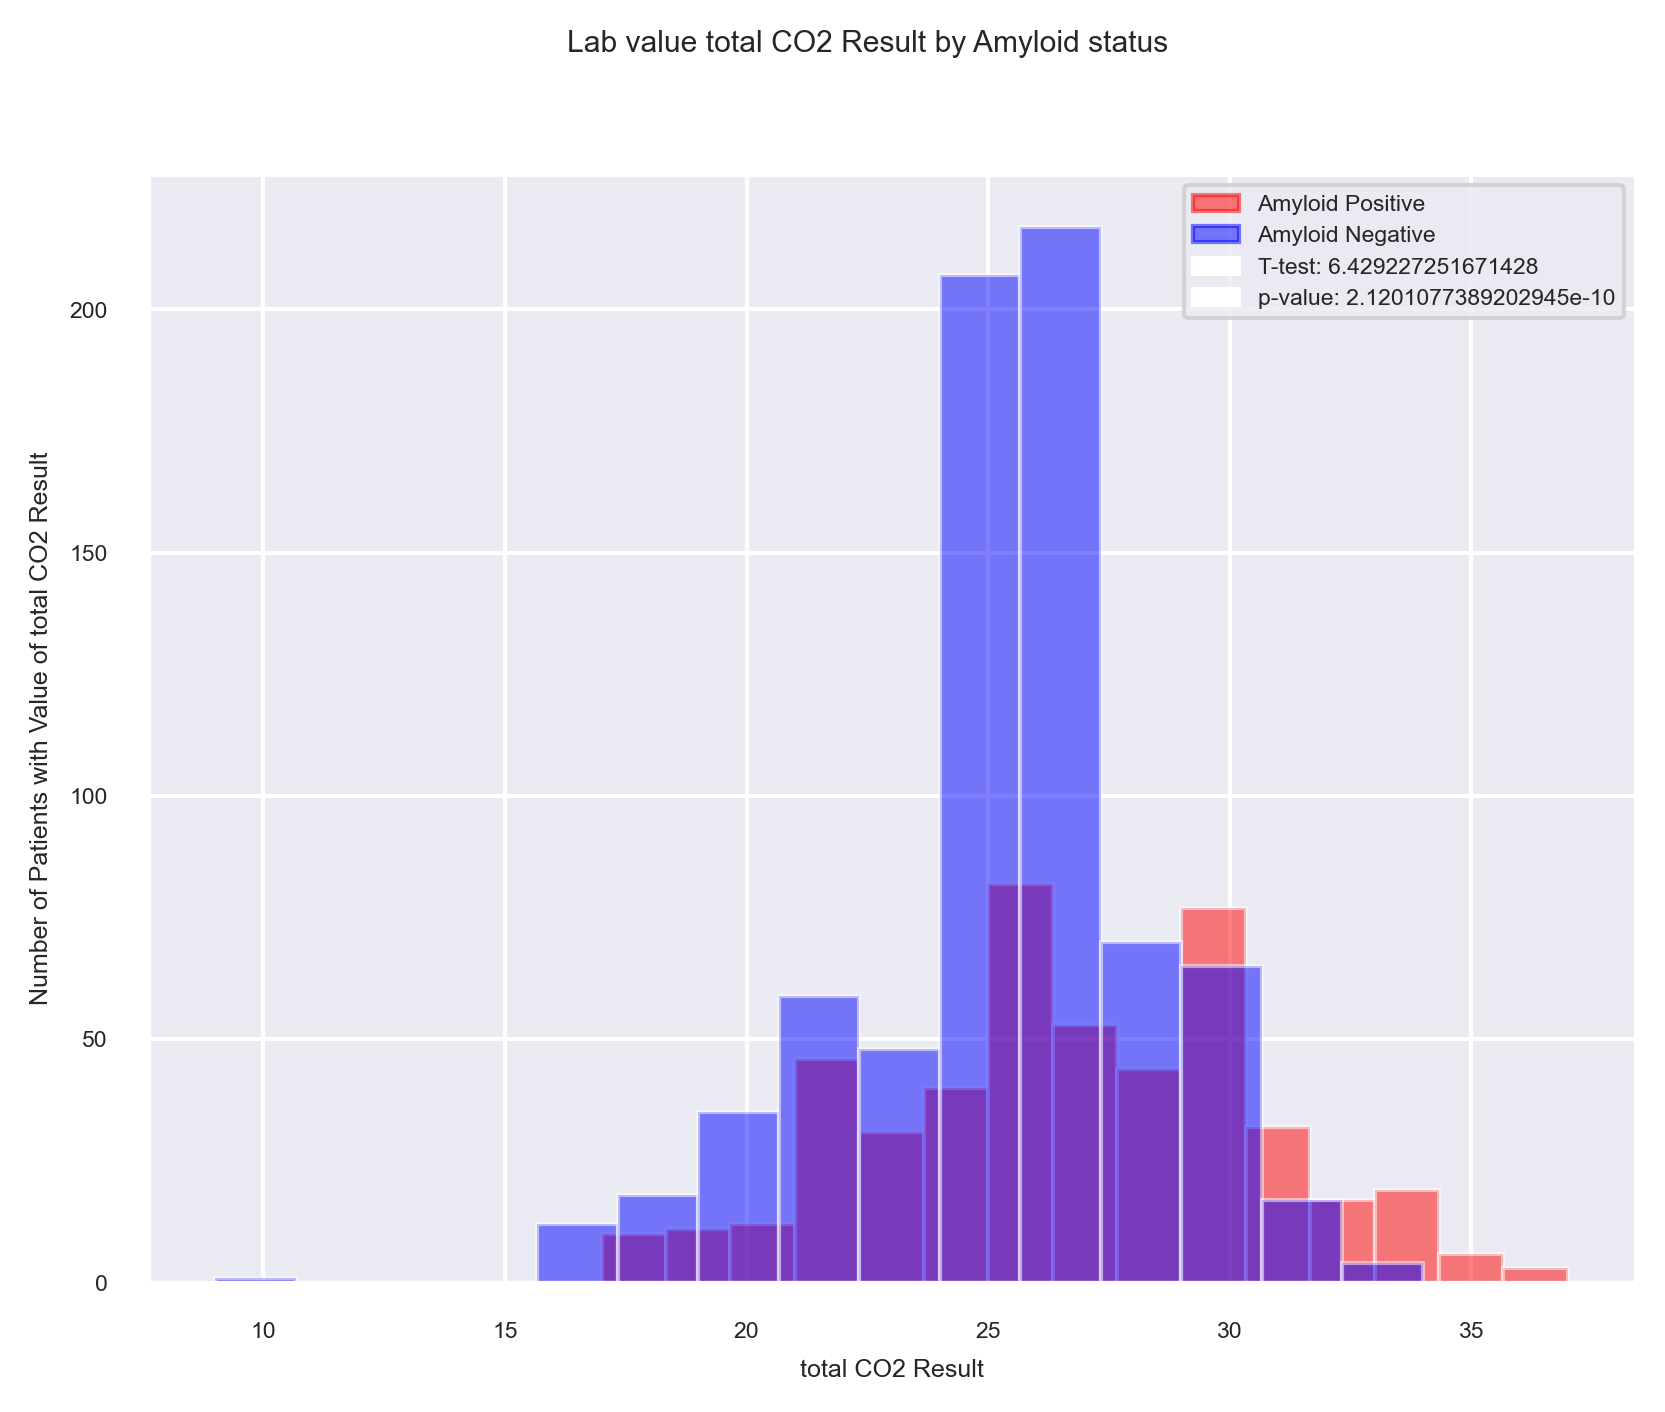

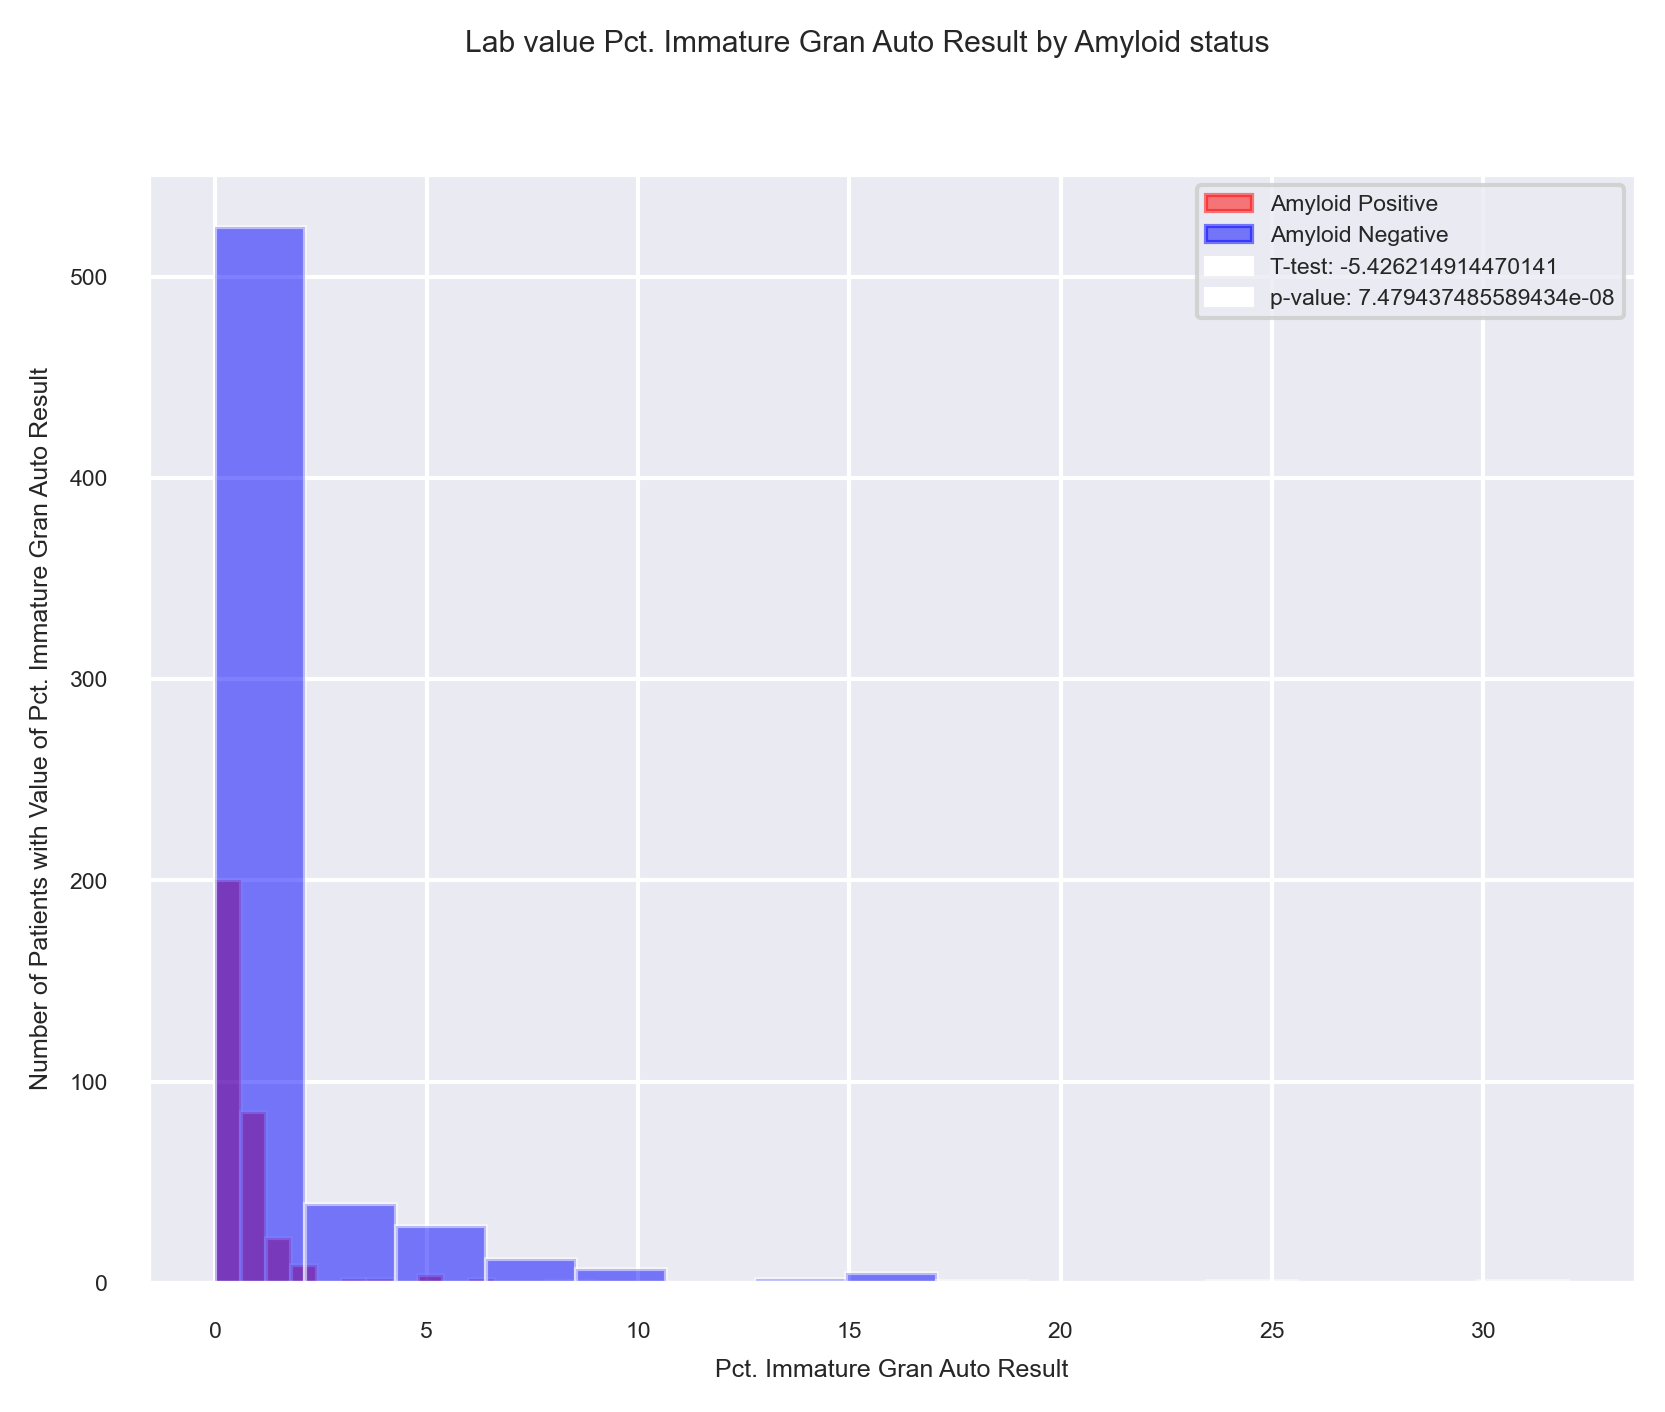

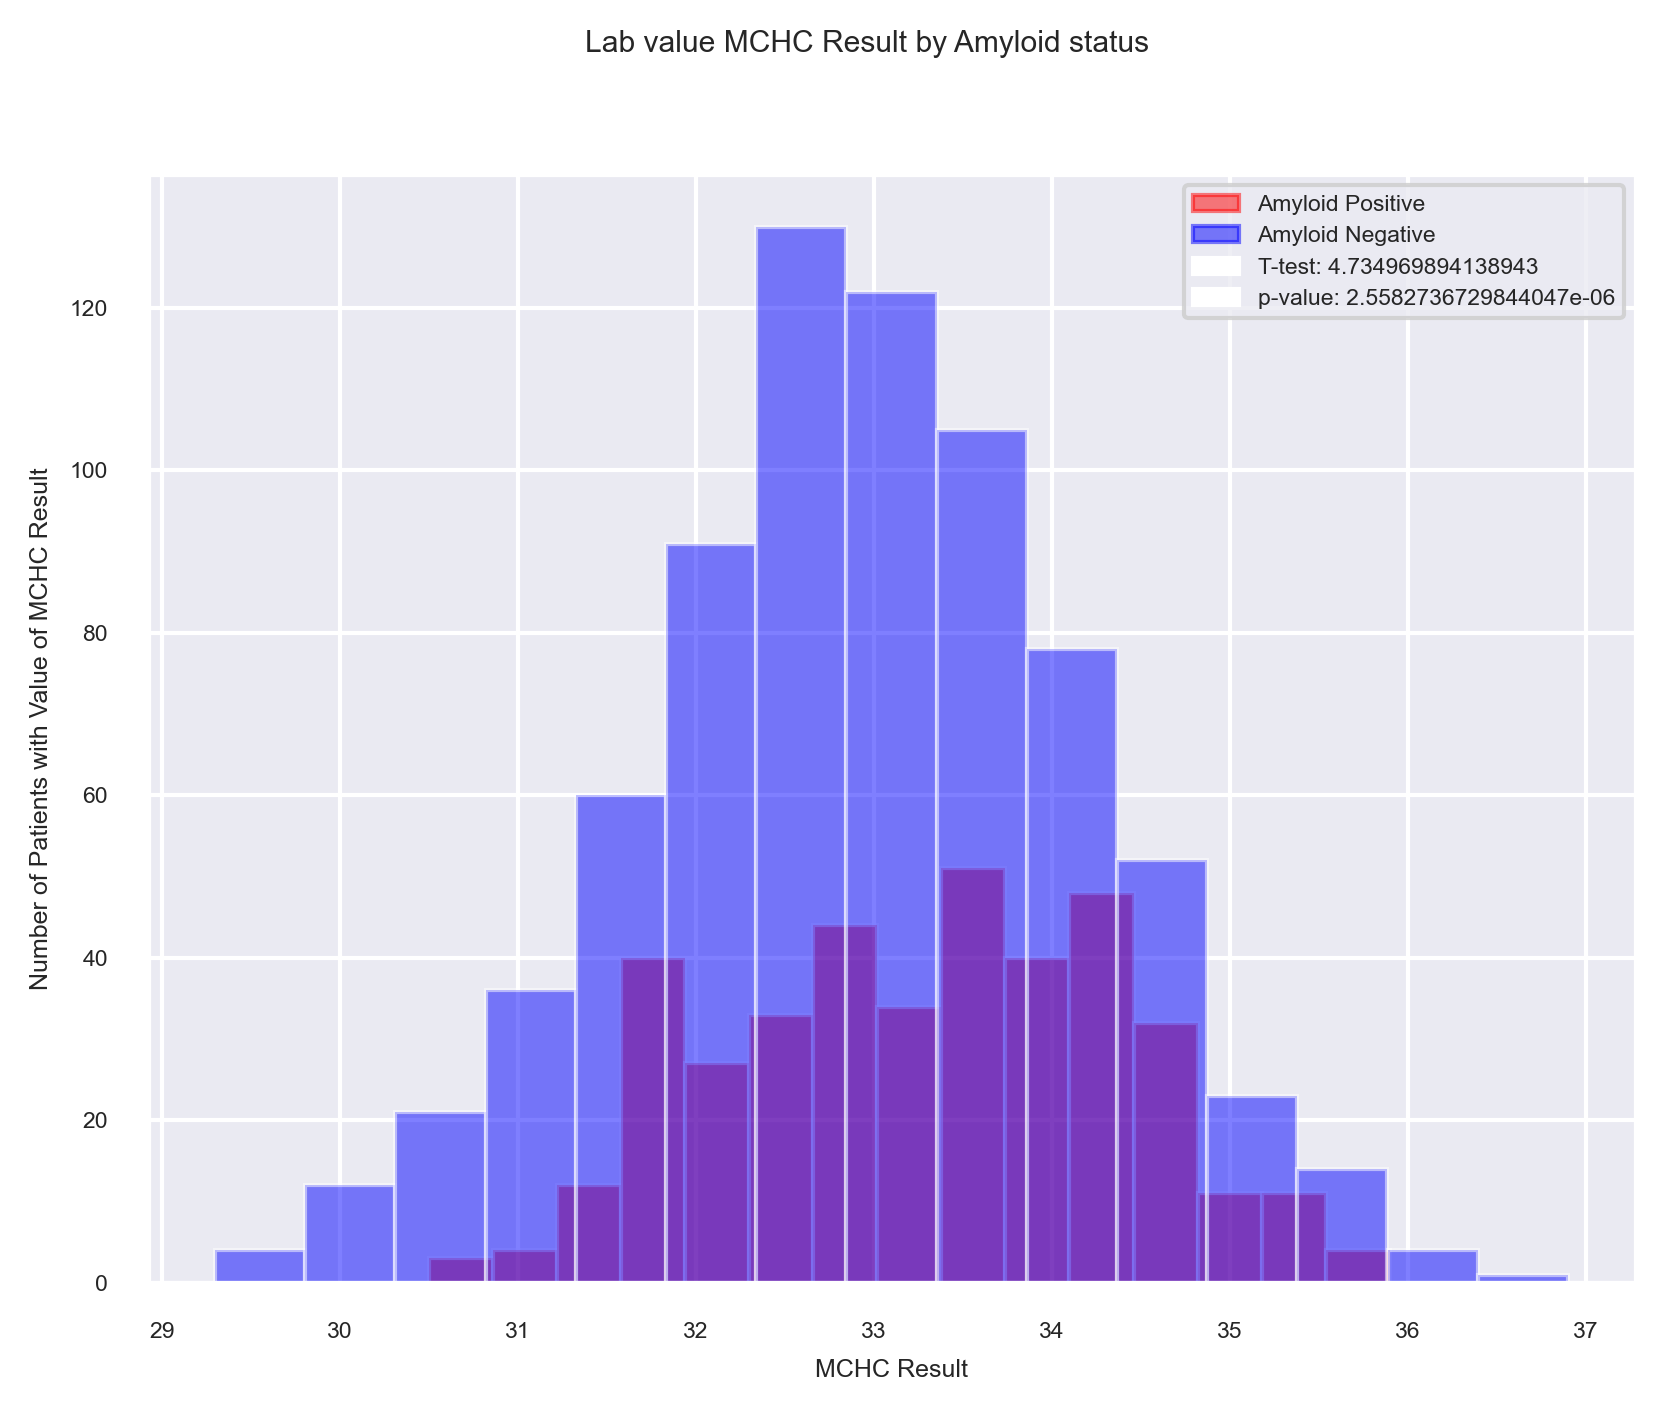

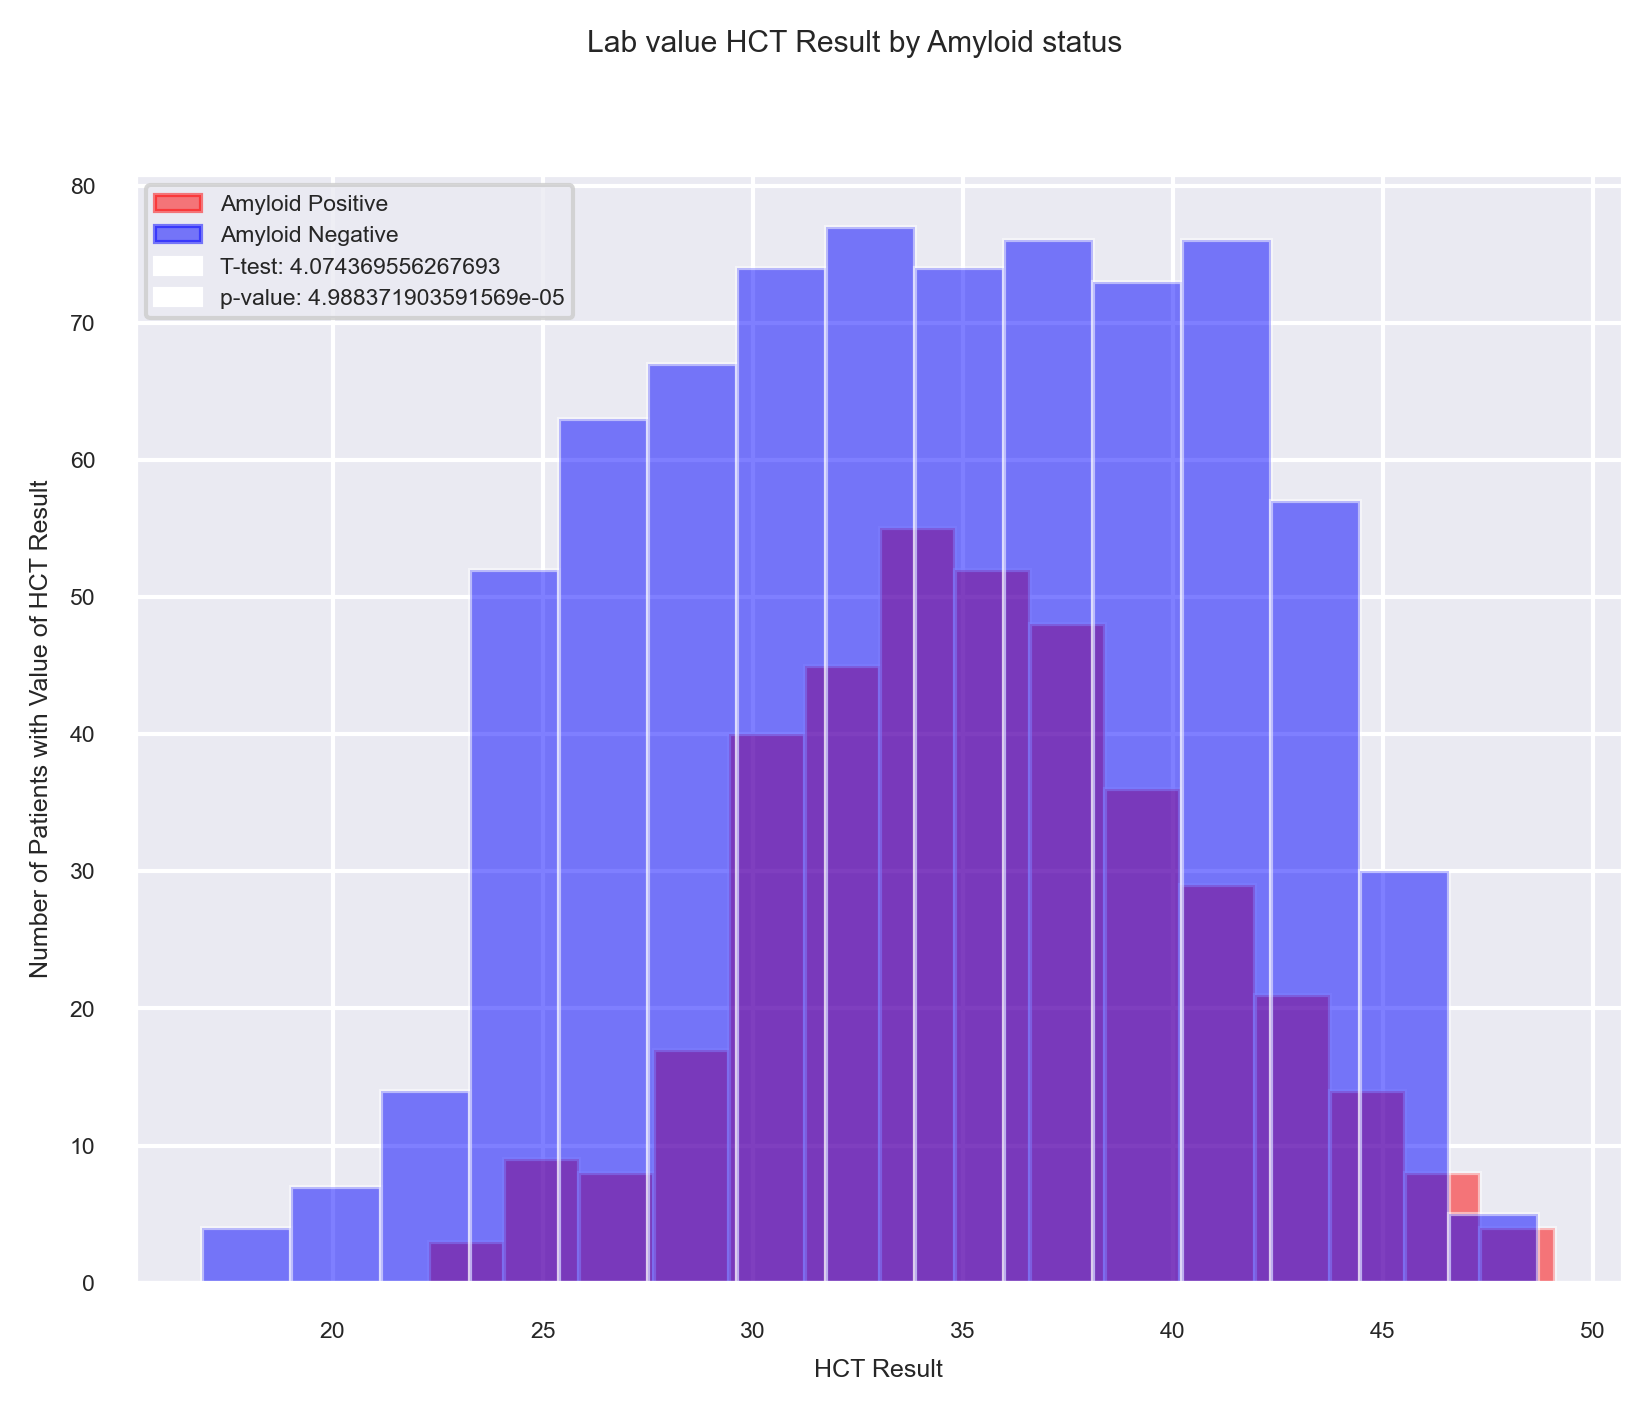

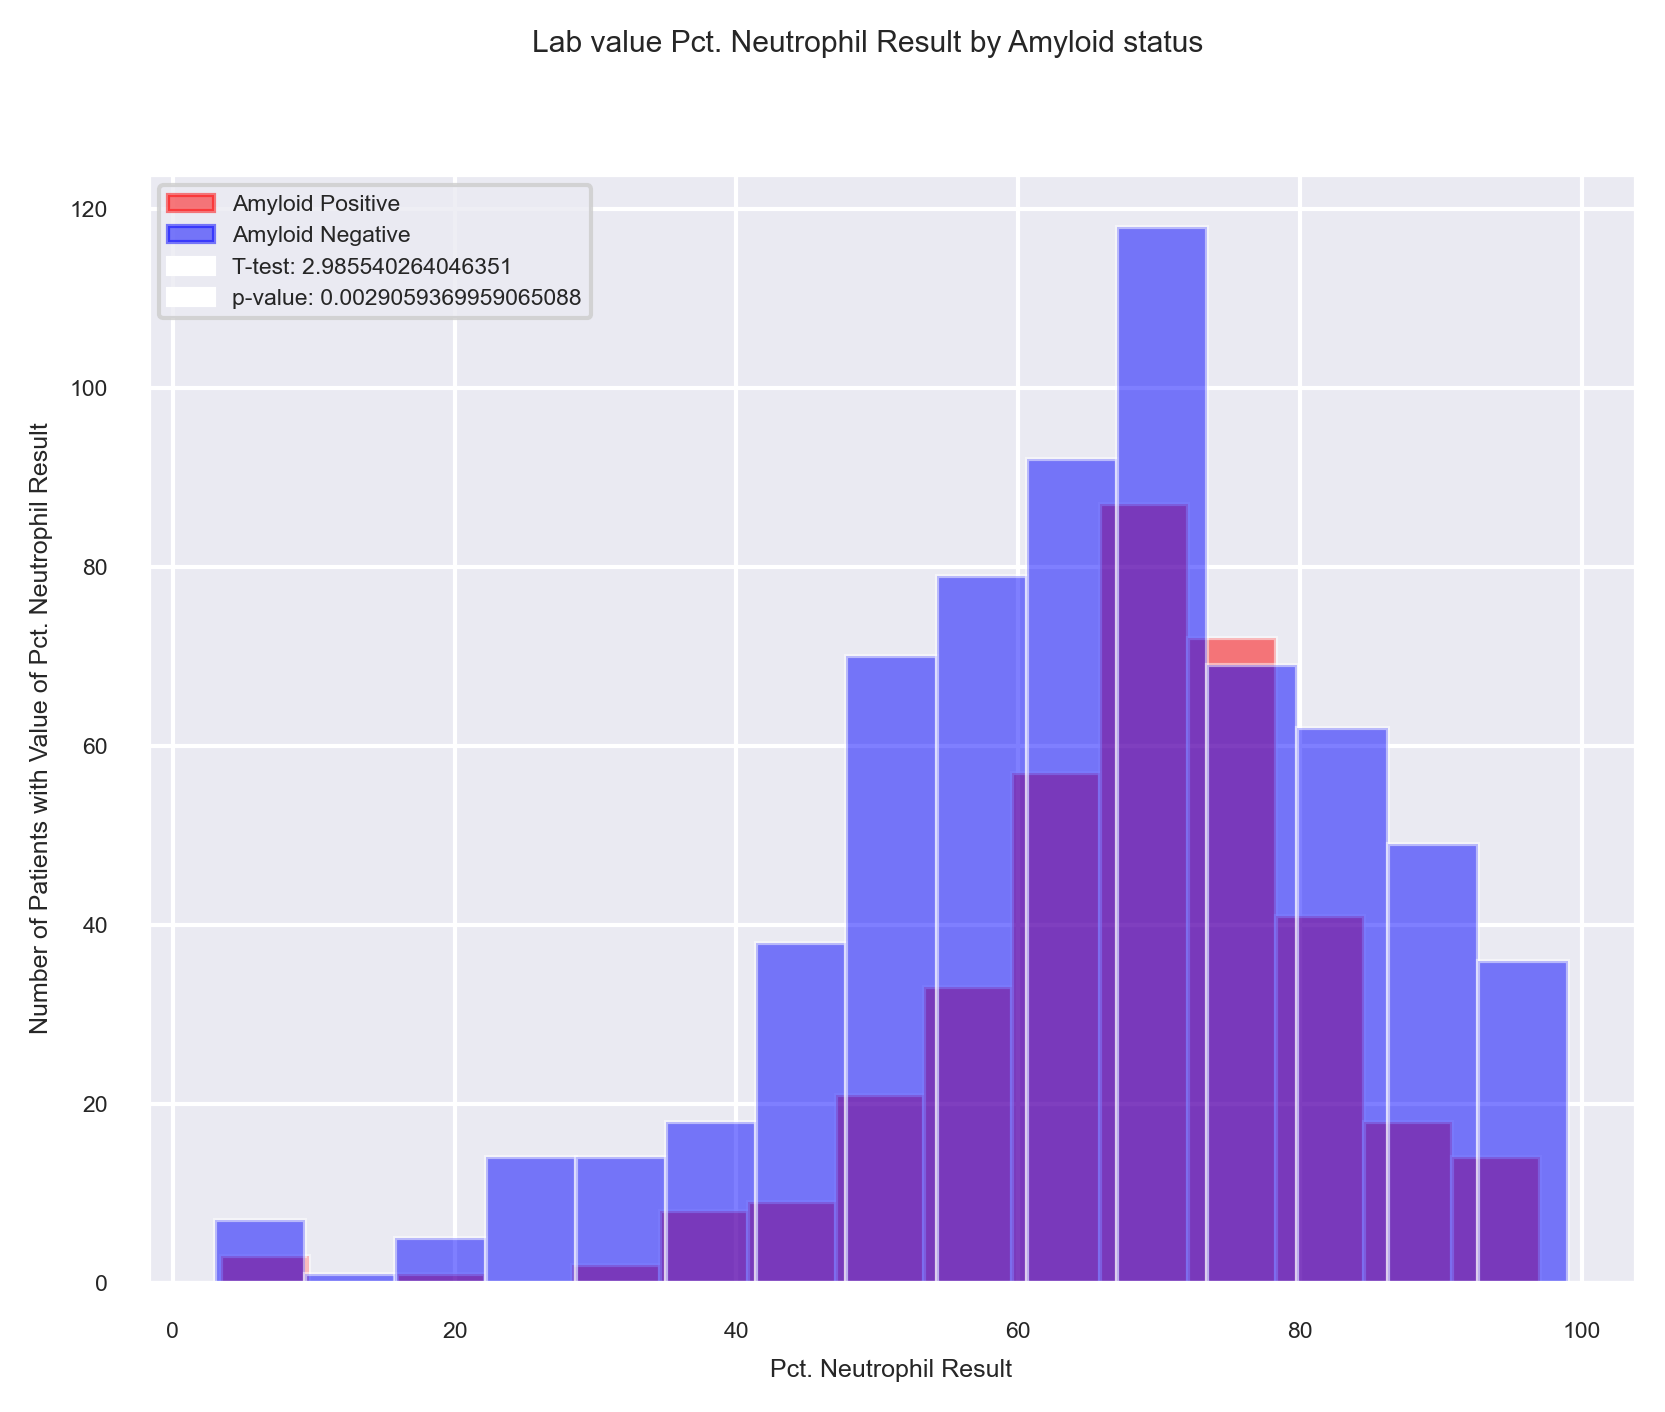

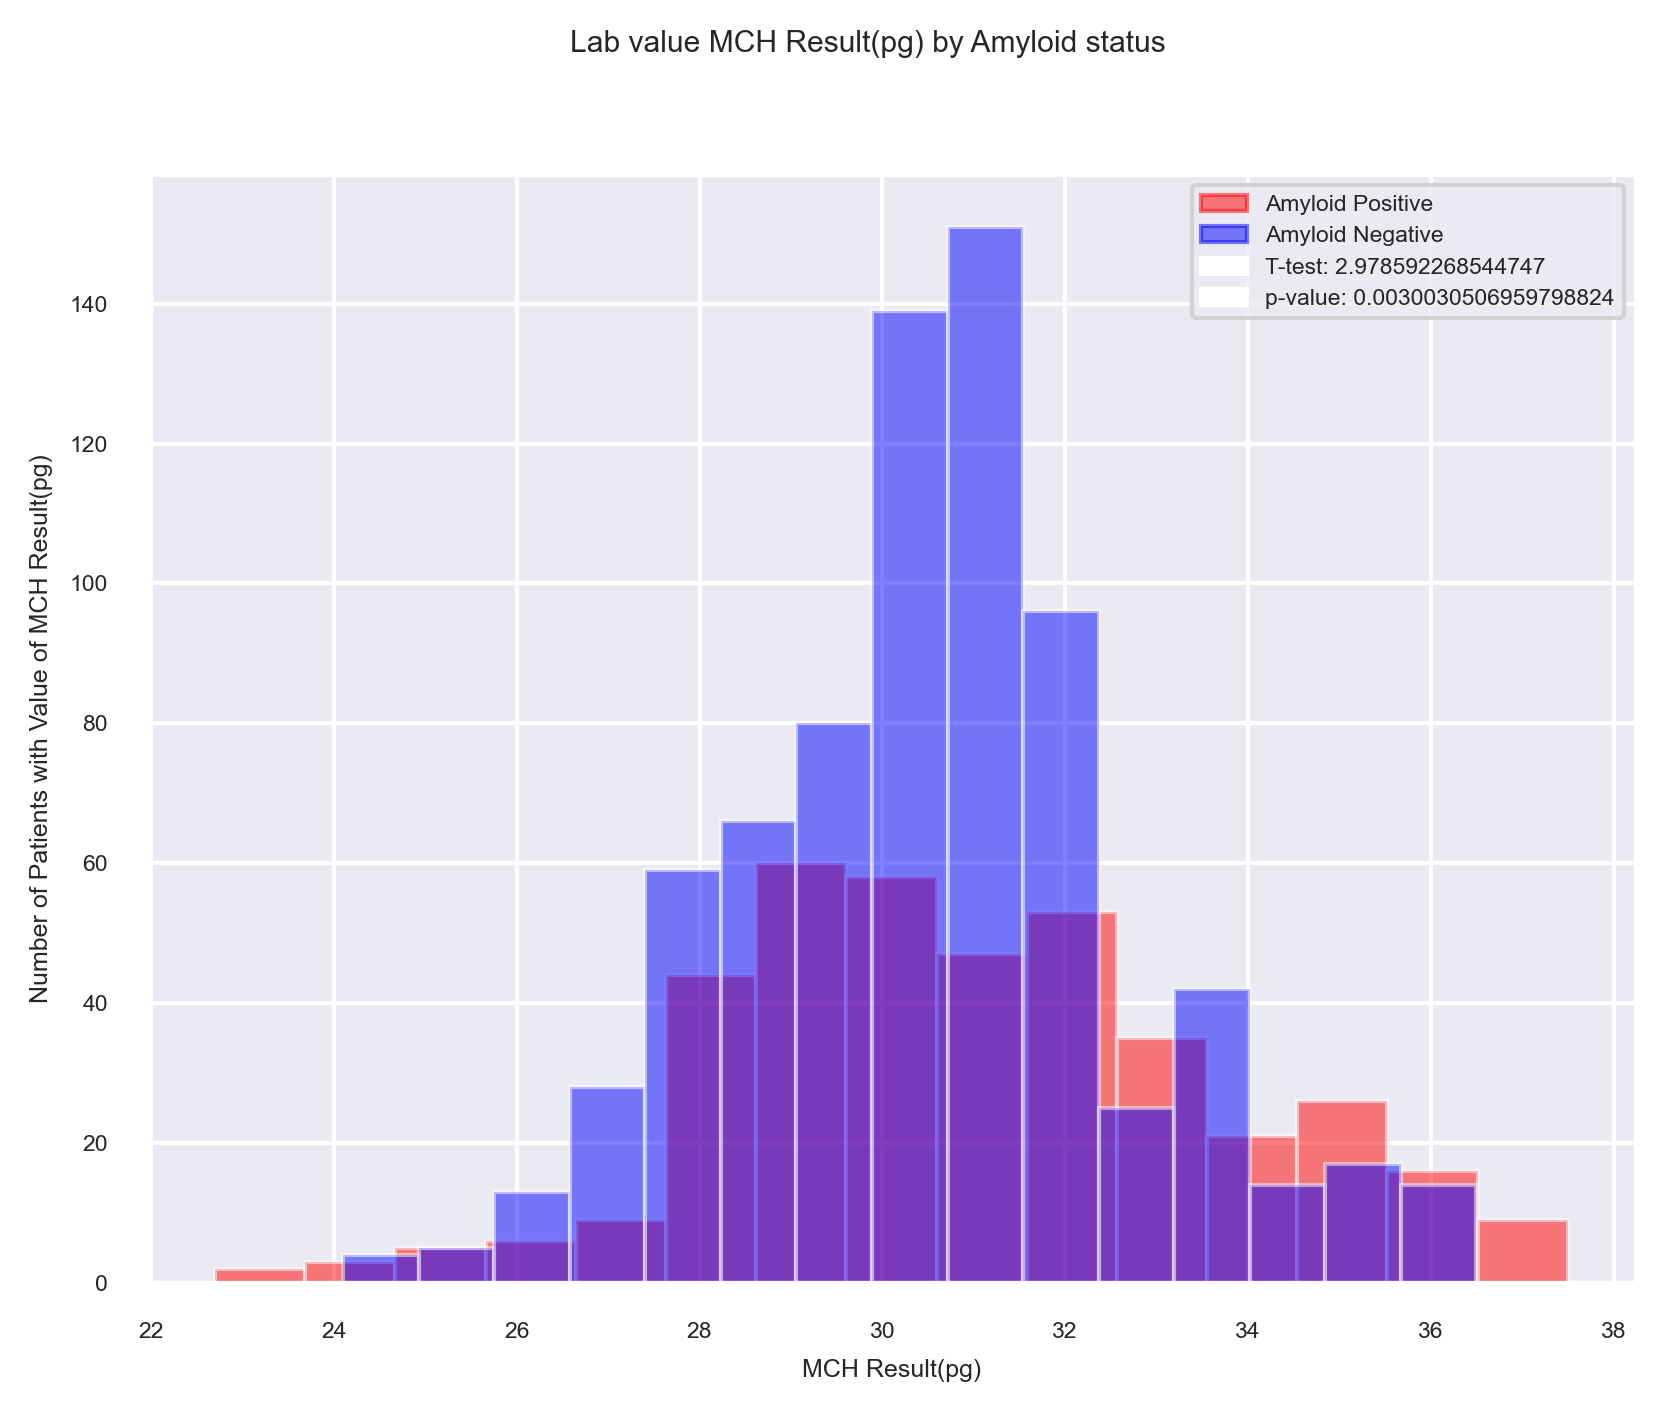

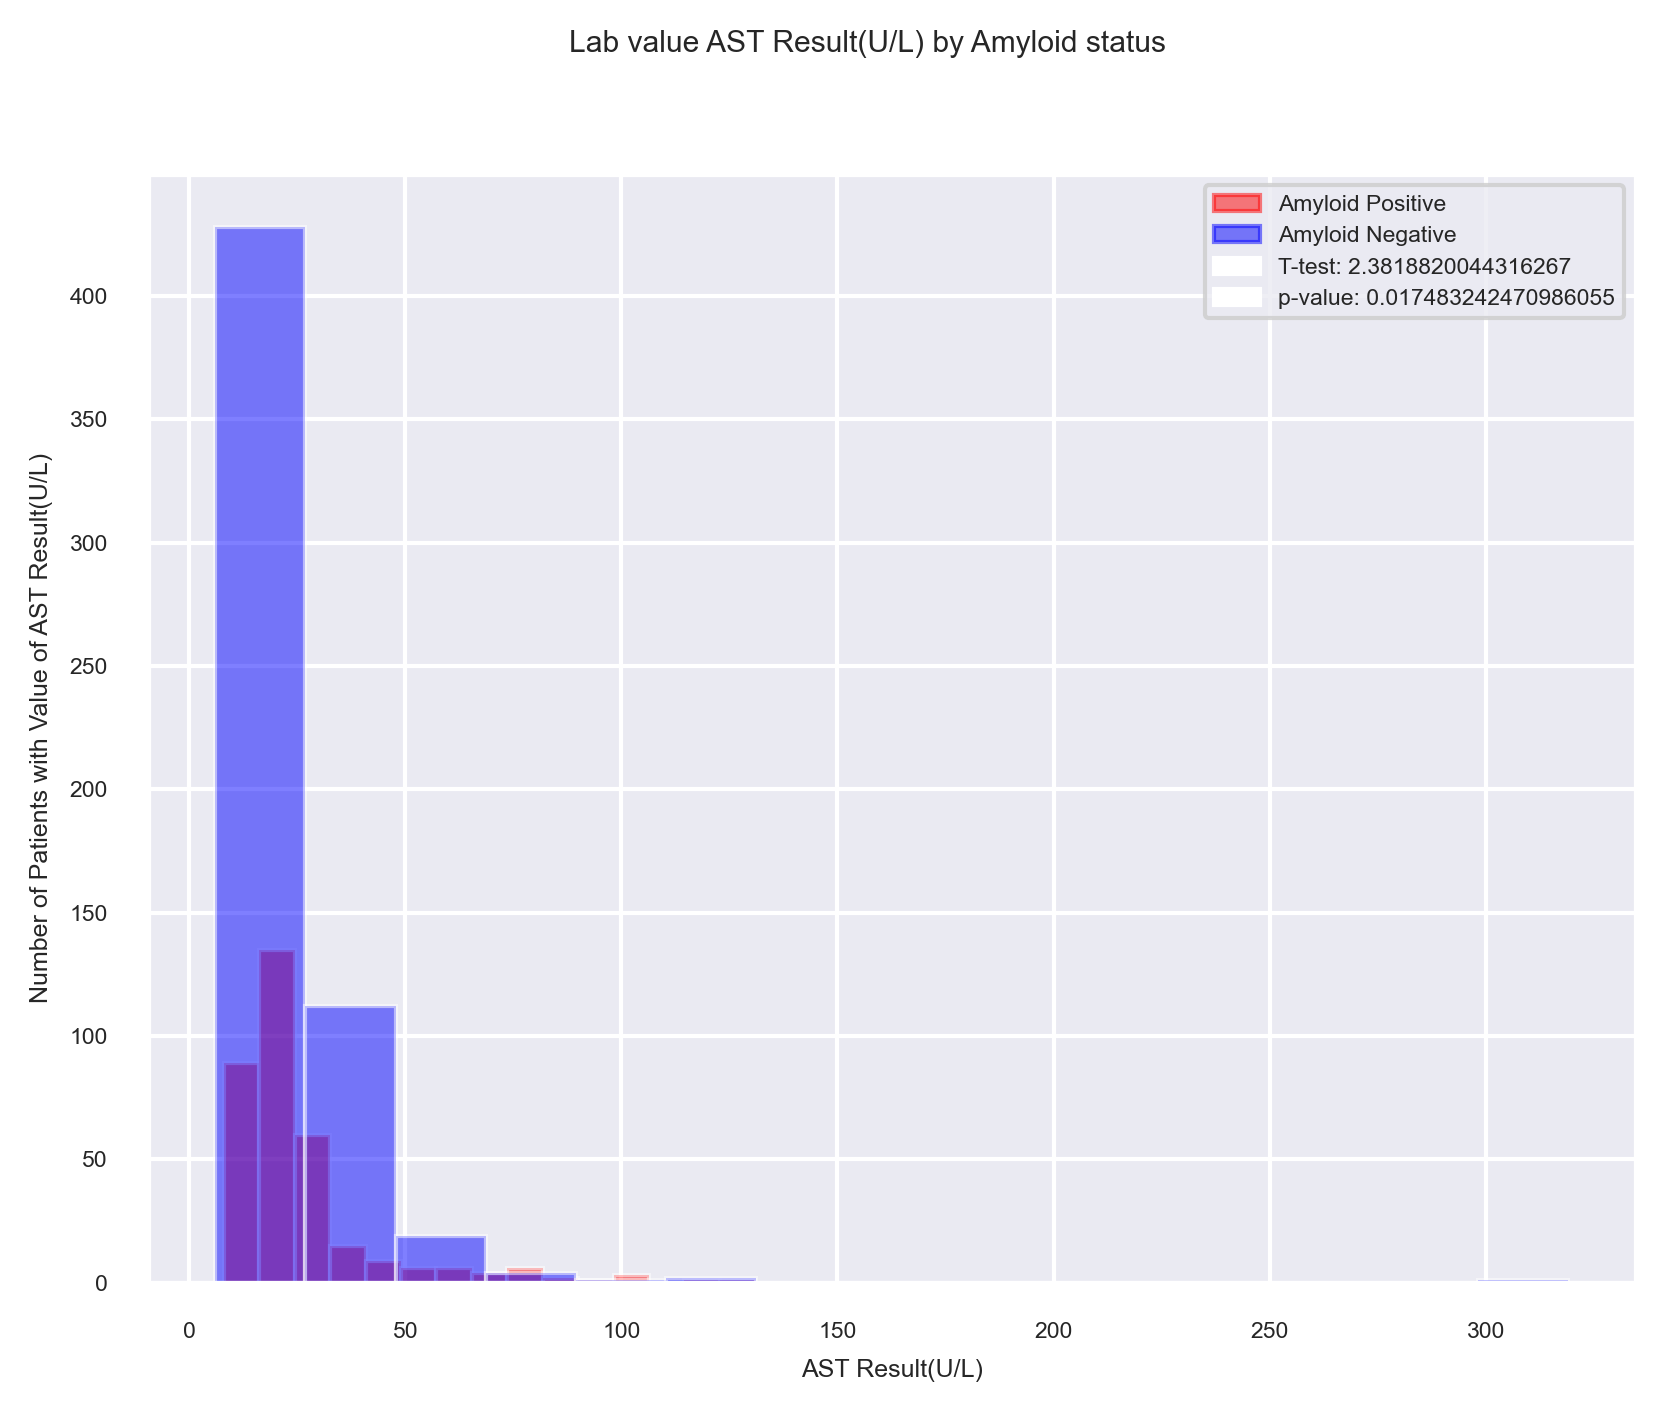

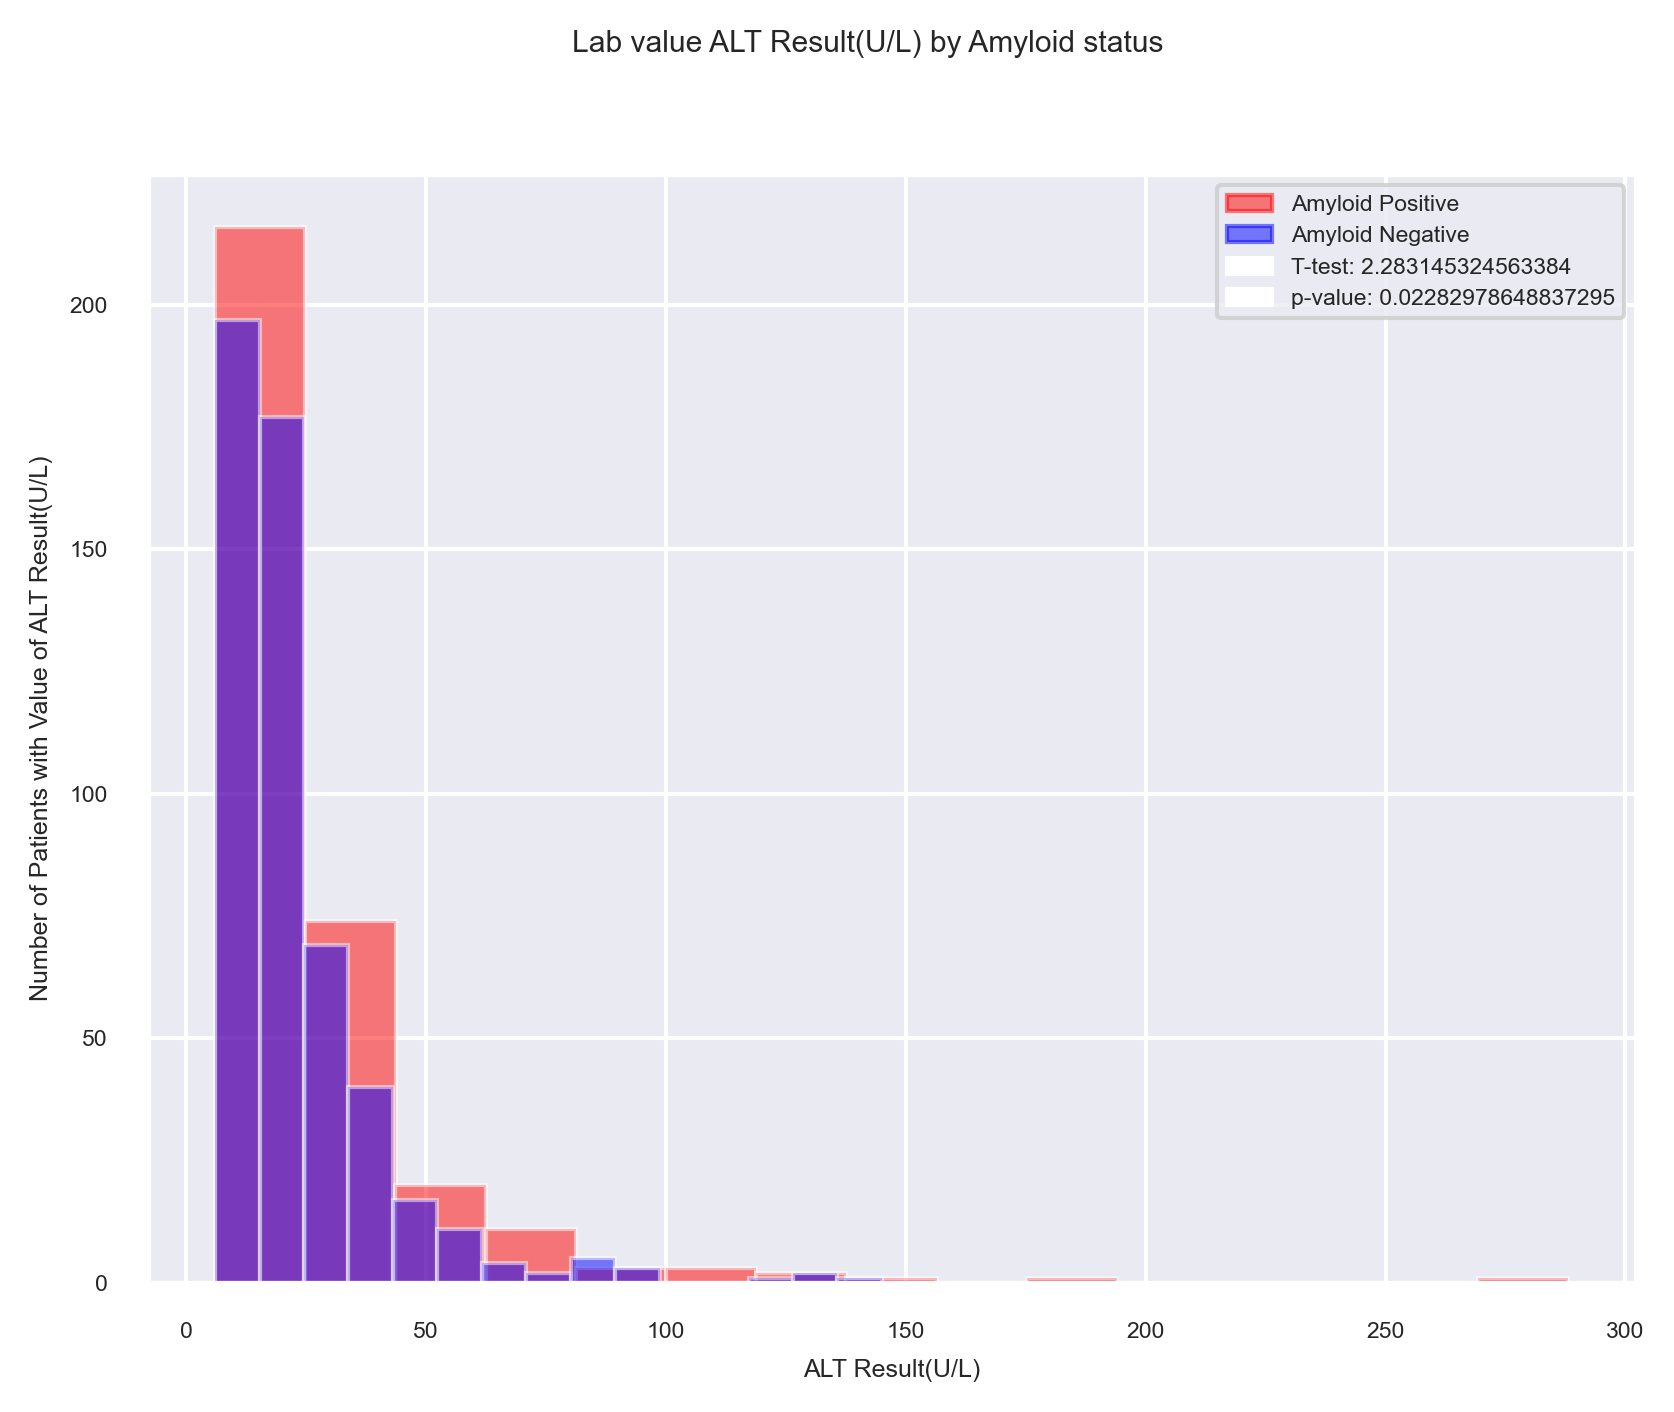

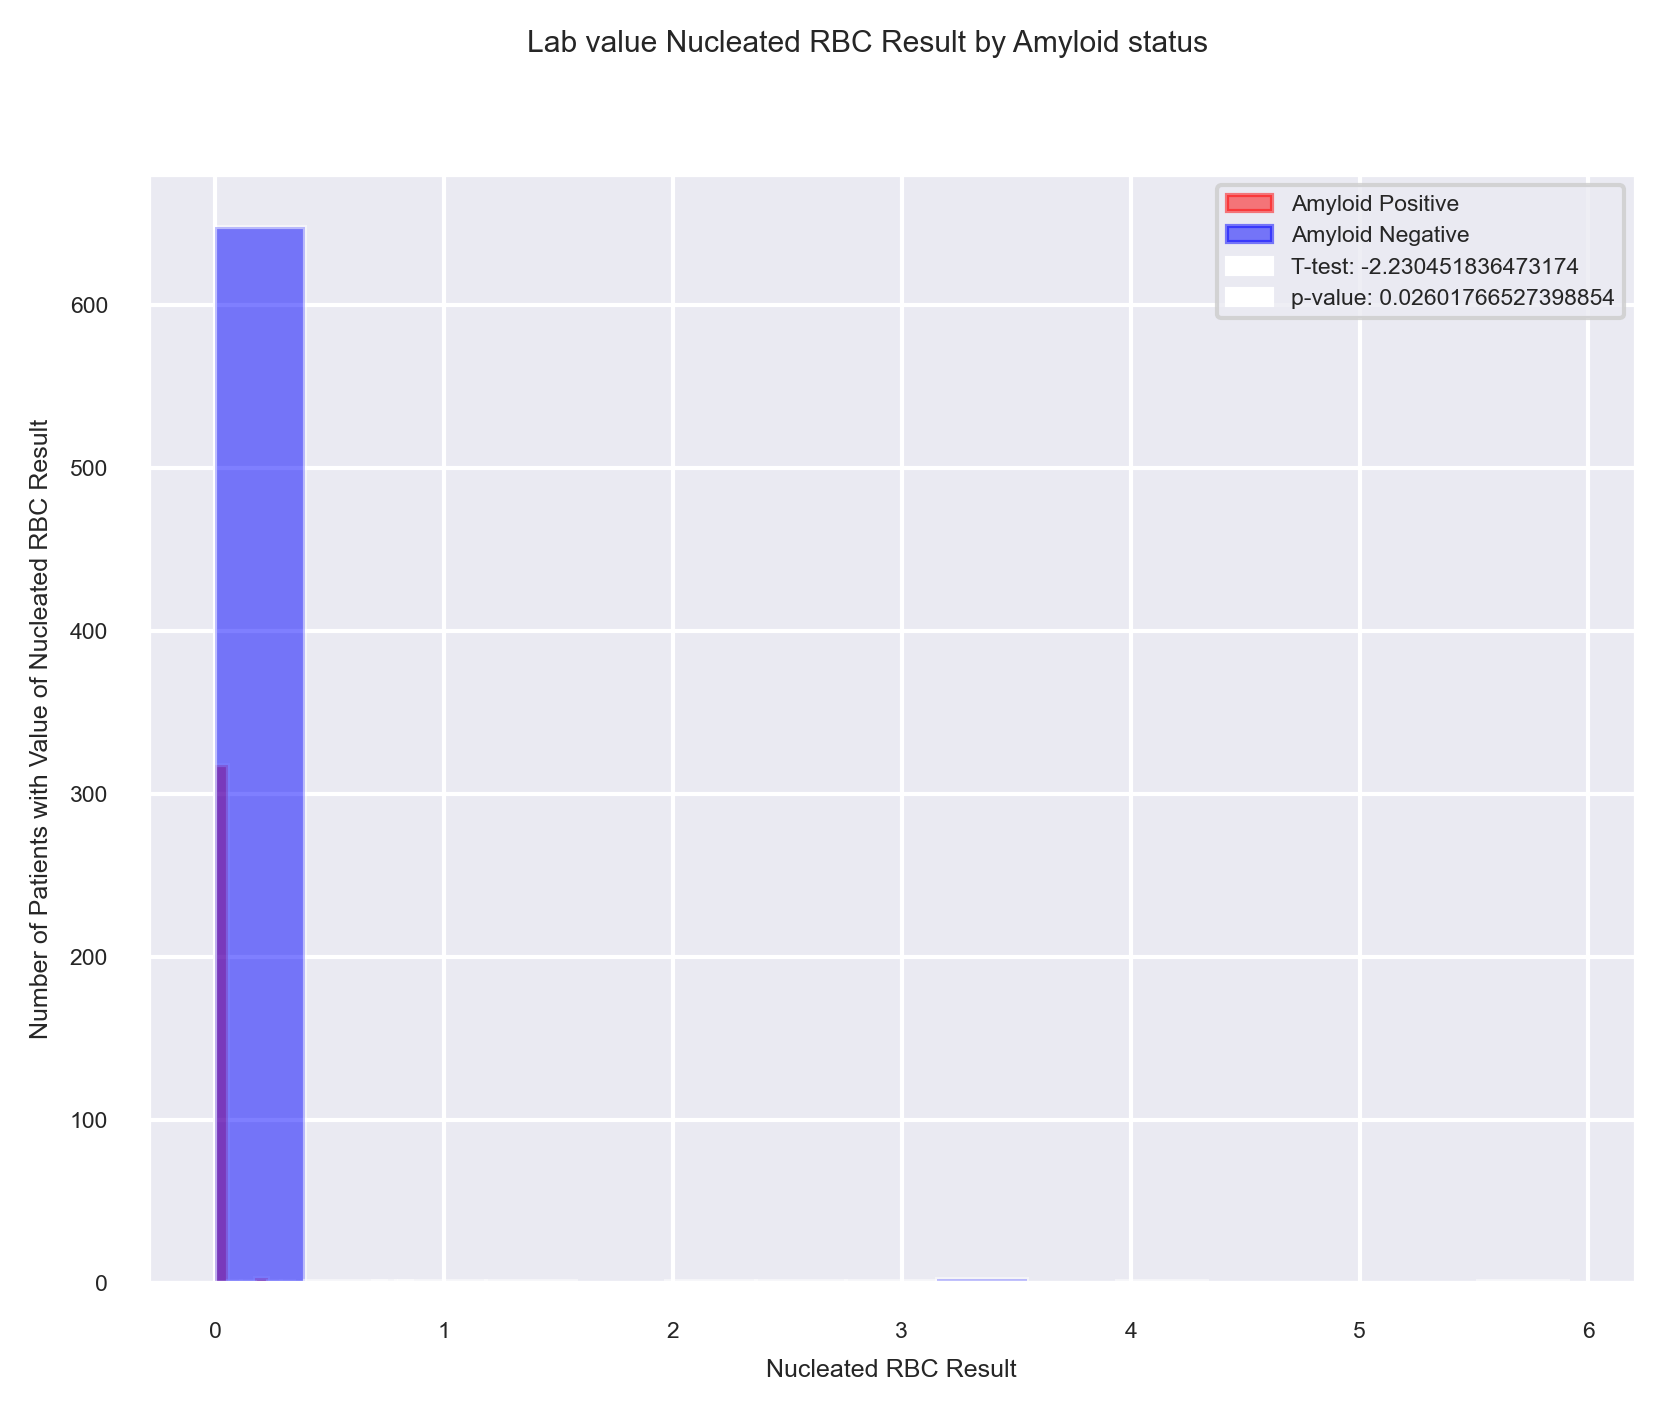

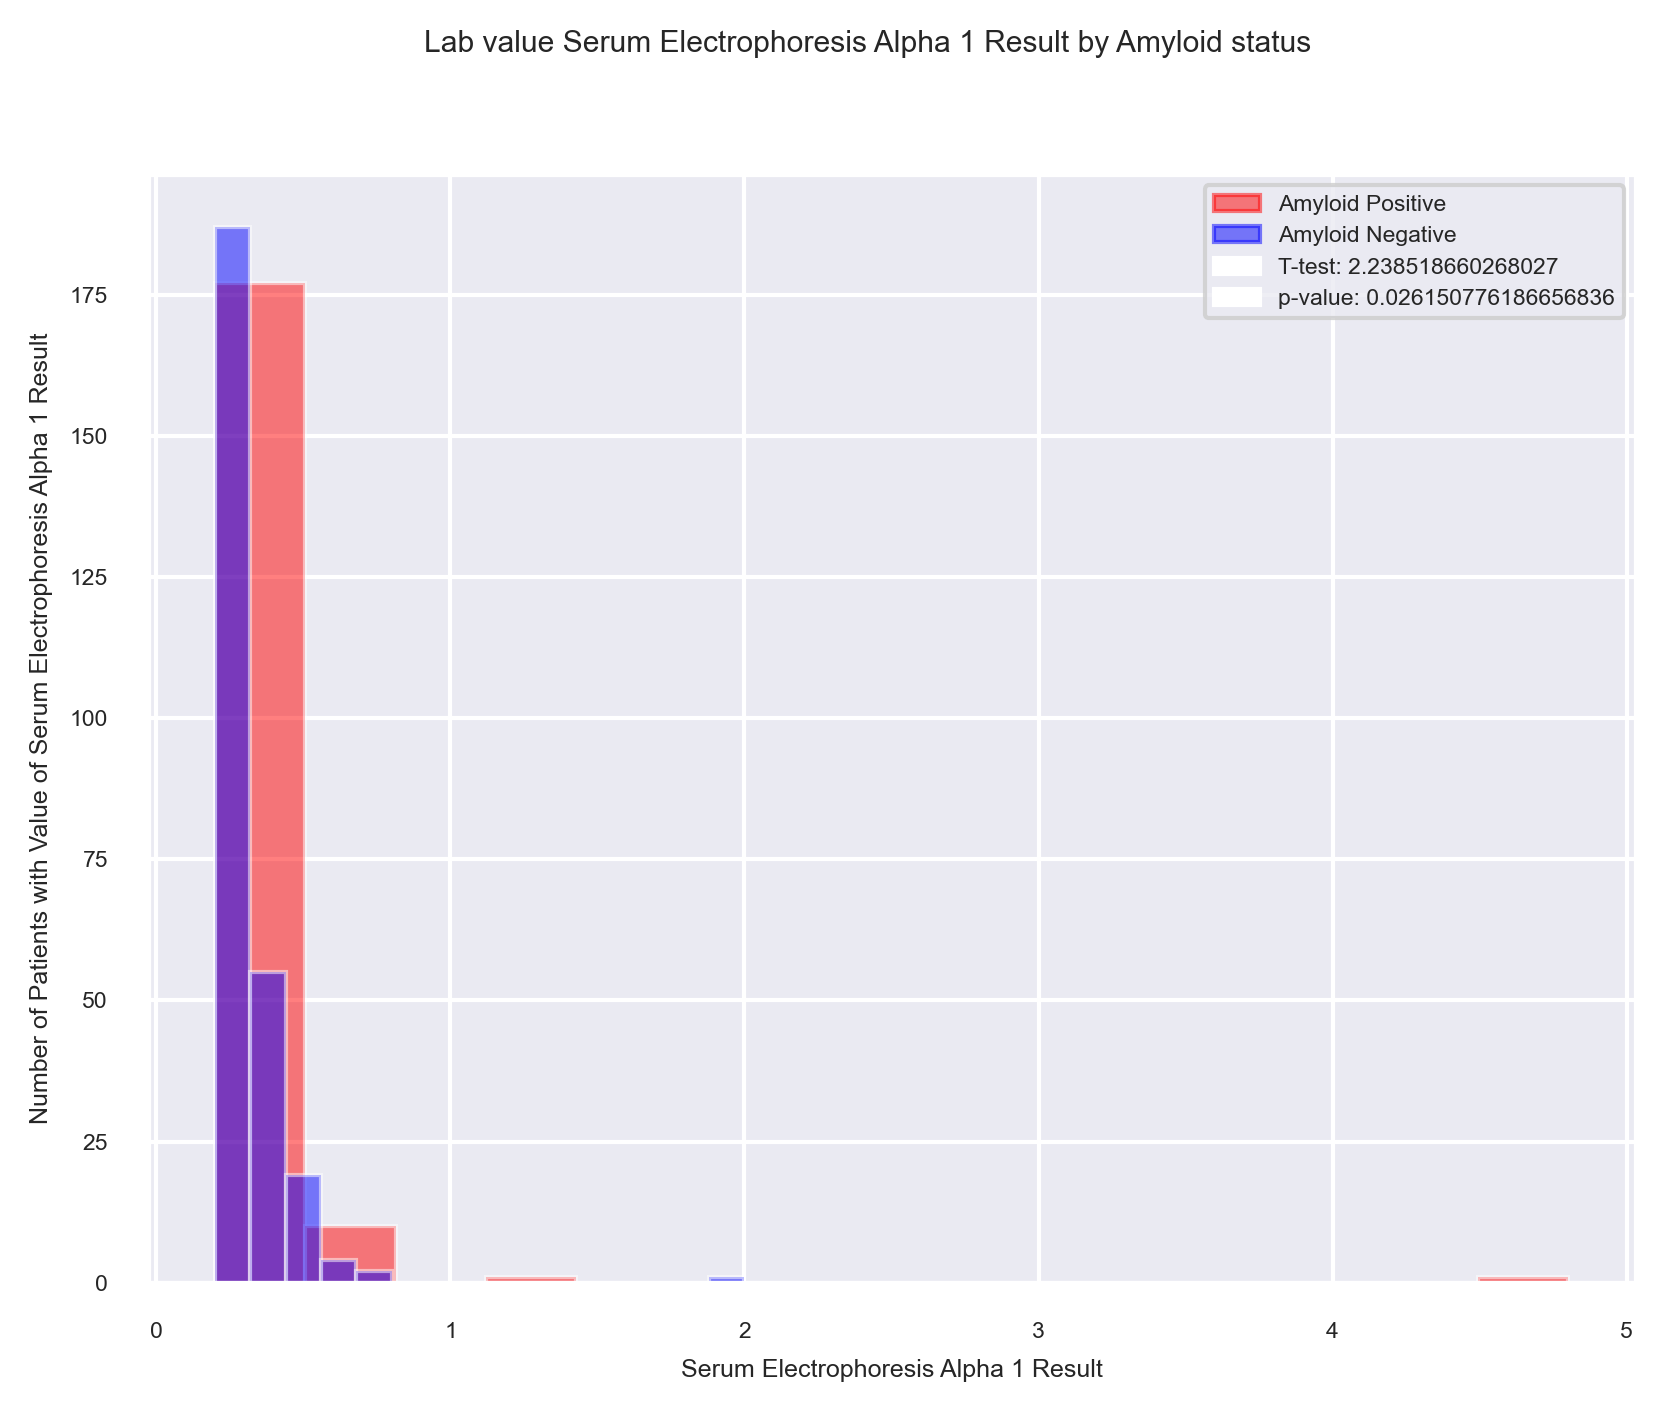

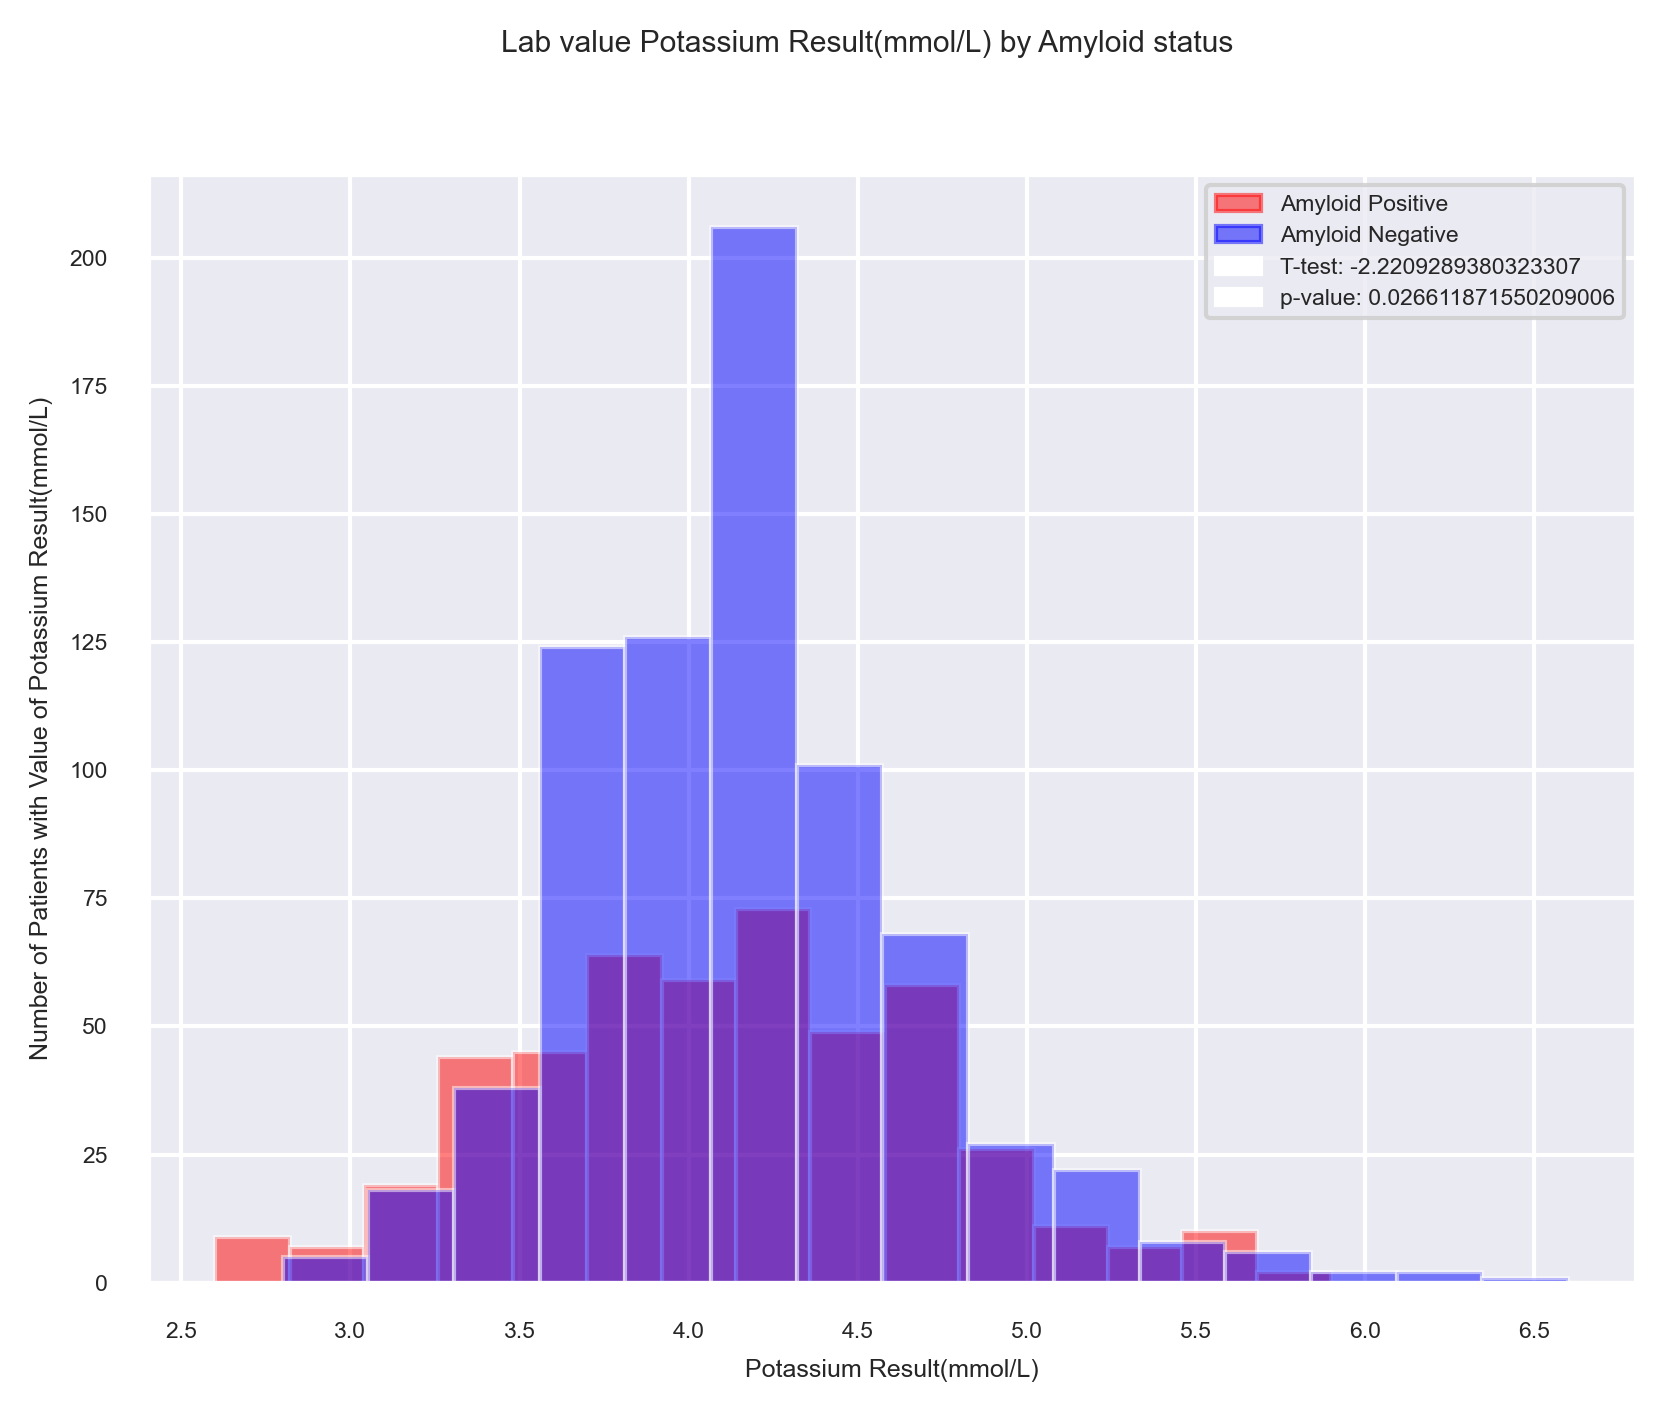

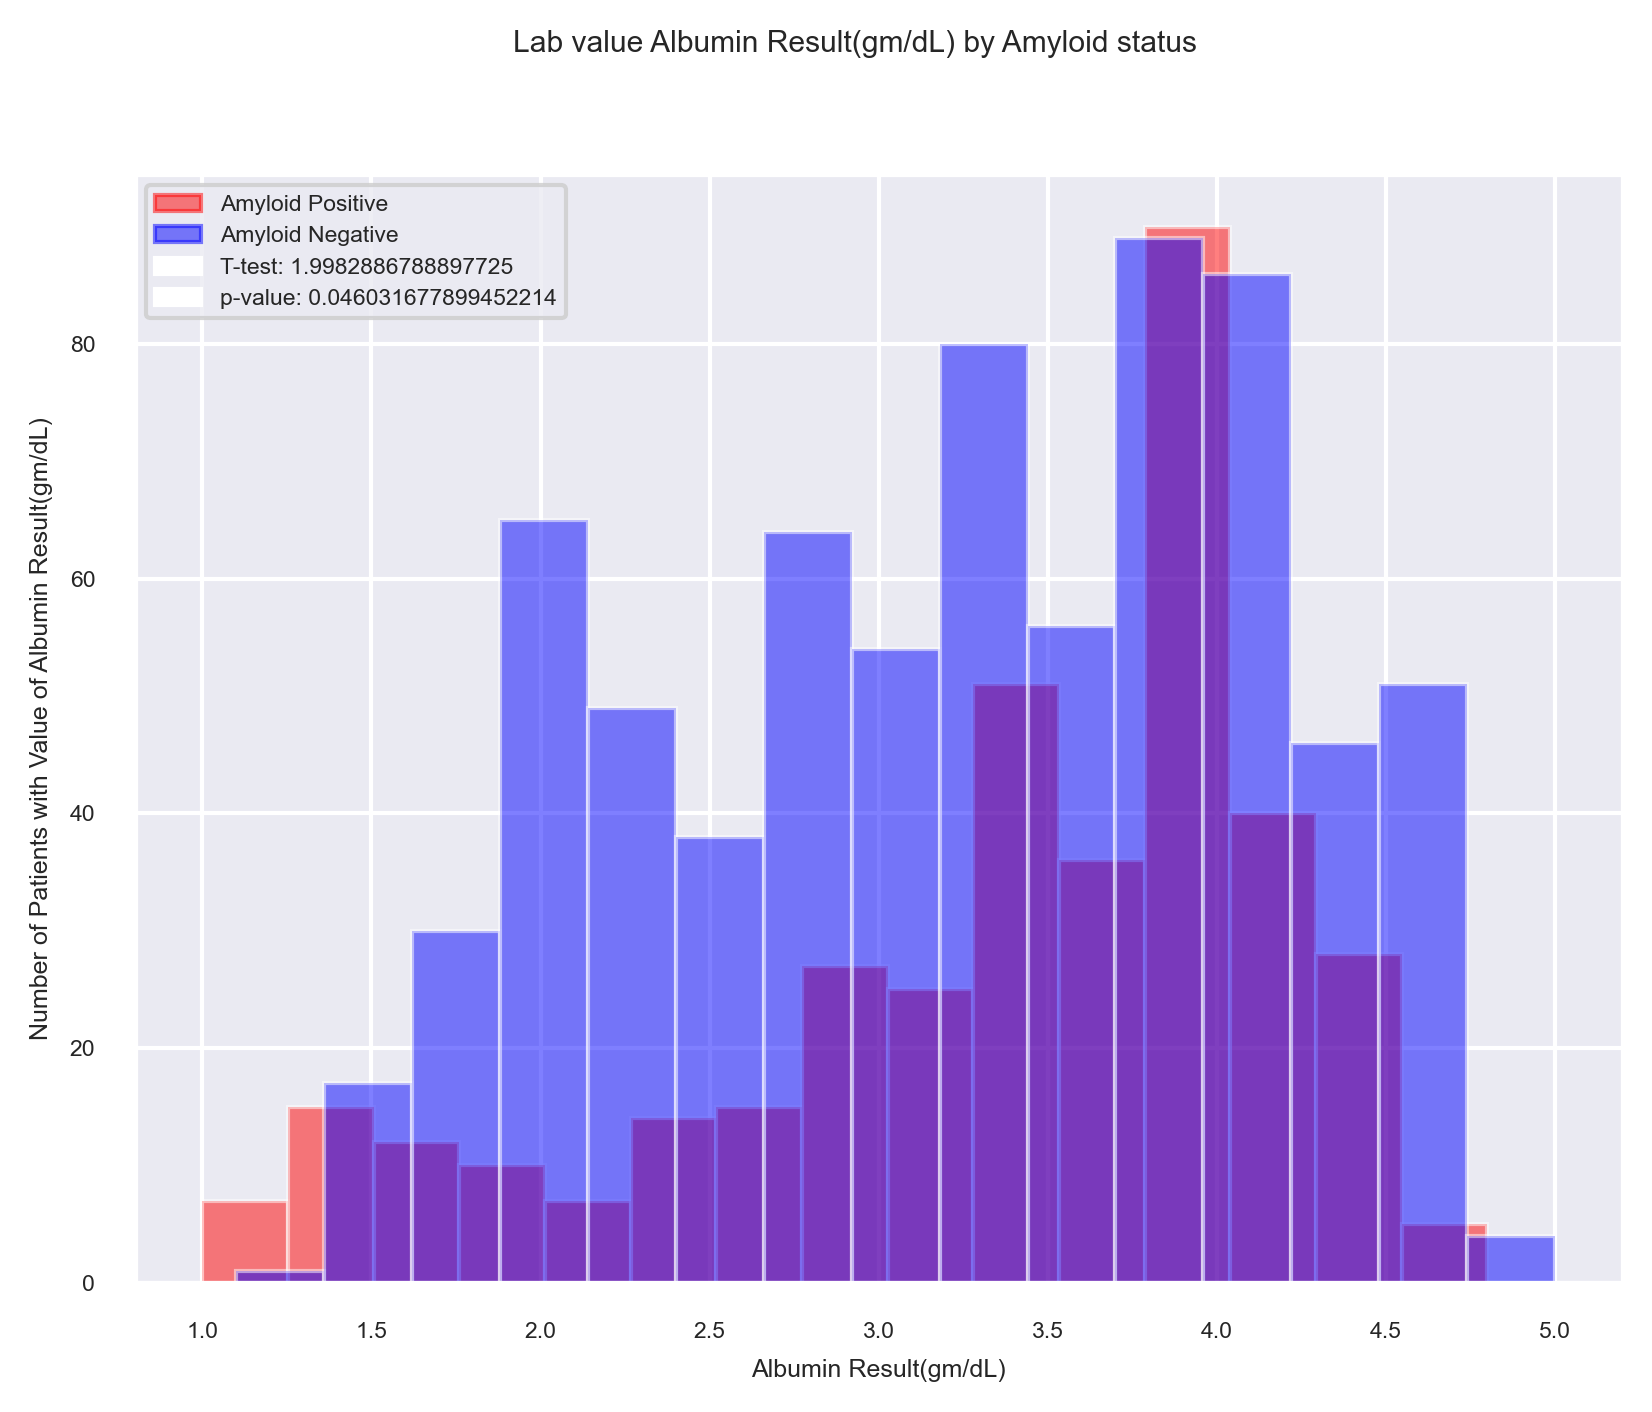

In [69]:
i = 0
df_ALPositive_Echo = labsPositive
df_ALNegative_Echo = labsNegative

for item in columns_to_plot:
    #addition of a way to remove the missing or penalty values... penalty = -1

    dataPostive = labsPositive[item].dropna(axis = 'index')
    dataNegative = labsNegative[item].dropna(axis = 'index')

    fig, ax = plt.subplots()
    ax.hist(dataPostive, bins = 15, color = "red", alpha =0.5)
    ax.hist(dataNegative, bins = 15, color = "blue", alpha = 0.5)
    ax.set_xlabel(item)
    ax.set_ylabel("Number of Patients with Value of " + item)
    amyloidpositive_patch = mpatches.Patch(color = 'red', alpha = 0.5, label = "Amyloid Positive")
    amyloidnegative_patch = mpatches.Patch(color = "blue", alpha = 0.5, label = "Amyloid Negative")
    stats_T_patch = mpatches.Patch(color = "white", label = "T-test: " + str(df_imagingValue_stats_2.at[item, 'statistic']))
    stats_pvalue_patch = mpatches.Patch(color = "white", label = "p-value: " + str(df_imagingValue_stats_2.at[item, 'pvalue']))
    ax.legend(handles = [amyloidpositive_patch, amyloidnegative_patch, stats_T_patch, stats_pvalue_patch])
    fig.suptitle("Lab value " + item + " by Amyloid status")

    fig_file_out = ptFn.outputFiguresPath(fileName_header=fileNameHeader, fileName_mid= "p005_" + str(i) + "_fig_" , 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    
    fig.savefig(fig_file_out, bbox_inches = "tight")
    i = i+1